# Nakagami Eval
- Nakagami (n1) e1 best (noise = 0.1, N_G_var = 1 X 10^-15)
- Nakagami (n1) e1 median 
- Nakagami (n1) e1 best (noise = 0.01, N_G_var = 1 X 10^-16)

In [1]:
import pandas as pd
import numpy as np
import os 
# # This is for only if you have multiple GPUs
# # If you have multiple GPUs, then pick ONE for this code.
# os.environ["CUDA_VISIBLE_DEVICES"]= "3" 
import tensorflow as tf

np.random.seed(1004)
tf.random.set_seed(1004)

/tmp/ipykernel_794990/94644243.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-05-13 17:42:42.957062: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 17:42:42.992421: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 17:42

In [2]:
import sys
import importlib
sys.path.append('../')

import model, evaluations, data, utils, data_hp
importlib.reload(model)
importlib.reload(evaluations)
importlib.reload(data)
importlib.reload(utils)
importlib.reload(data_hp)

<module 'data_hp' from '/home/ylee/WirelessSensor2024/DataAnalysis/../data_hp.py'>

In [3]:
dir_main = '../saved_models'
max_iterations = 10
data_size_test = data_hp.data_size_test

# Nakagami Test Data

In [4]:
dict_n_test = data_hp.dict_n1_test

con_n_test = data.Nakagami(
        m_array=dict_n_test["m_array"],
        eta=dict_n_test["eta"],
        Pt=dict_n_test["Pt"],
        alpha=dict_n_test["alpha"],
        d_0=dict_n_test["d_0"],
        d_array=dict_n_test["d_array"],
        noise=dict_n_test["noise"],
        # noise=0.1,
        low=dict_n_test["low"],
        high=dict_n_test["high"],
    ) 
test_n_data, test_n_condition, test_n_indices = con_n_test.generate(data_size_test)
df_n_test_back_scaled = pd.DataFrame(np.hstack((test_n_data, test_n_indices,)), columns=['genuine', 'd'])

# Fine the best Nakagami e1 == noise=0.1

In [5]:
name_dir_n_e1 = 'Nakagami'
dir_sub_n_e1 = 'Nakagami'
dir_n_e1 = f"{dir_main}/{name_dir_n_e1}"

list_dir_csv_n_e1 = list()
for ep in range(max_iterations):
    list_dir_csv_n_e1.append(f"{dir_n_e1}/{ep}/{dir_sub_n_e1}/log.csv")

list_dir_csv_n_e1


['../saved_models/Nakagami/0/Nakagami/log.csv',
 '../saved_models/Nakagami/1/Nakagami/log.csv',
 '../saved_models/Nakagami/2/Nakagami/log.csv',
 '../saved_models/Nakagami/3/Nakagami/log.csv',
 '../saved_models/Nakagami/4/Nakagami/log.csv',
 '../saved_models/Nakagami/5/Nakagami/log.csv',
 '../saved_models/Nakagami/6/Nakagami/log.csv',
 '../saved_models/Nakagami/7/Nakagami/log.csv',
 '../saved_models/Nakagami/8/Nakagami/log.csv',
 '../saved_models/Nakagami/9/Nakagami/log.csv']

In [6]:
list_csv_n_e1 = list()
for version, local_dir in enumerate(list_dir_csv_n_e1):
    local_df_n_e1 = pd.read_csv(local_dir)
    local_df_n_e1['version'] = version
    list_csv_n_e1.append(local_df_n_e1)

list_csv_n_e1

[    epoch      loss  val_loss    avg_oa       std  version
 0       1  1.320570  1.370258  0.366375  0.263245        0
 1       2  0.303417  0.124234  0.833811  0.197575        0
 2       3  0.120996  0.120384  0.934968  0.023459        0
 3       4  0.118348  0.117933  0.962231  0.017274        0
 4       5  0.116611  0.116618  0.962296  0.014546        0
 5       6  0.116910  0.115779  0.959252  0.016132        0
 6       7  0.116142  0.117079  0.948004  0.012352        0
 7       8  0.116414  0.116980  0.965975  0.014142        0
 8       9  0.116303  0.114790  0.957023  0.016587        0
 9      10  0.115716  0.116074  0.972284  0.009618        0
 10     11  0.115751  0.114268  0.960396  0.012686        0
 11     12  0.114789  0.116284  0.959776  0.021074        0
 12     13  0.115868  0.115264  0.956037  0.019446        0
 13     14  0.115862  0.116037  0.961980  0.013416        0
 14     15  0.115164  0.115819  0.959111  0.020136        0,
     epoch      loss  val_loss    avg_o

In [7]:
df_whole_n_e1 = pd.concat(list_csv_n_e1, axis=0).reset_index(drop=True)
df_whole_n_e1['metric'] = df_whole_n_e1['avg_oa'] - 2 * df_whole_n_e1['std']
df_whole_n_e1

epoch      loss  val_loss    avg_oa       std  version    metric
0        1  1.320570  1.370258  0.366375  0.263245        0 -0.160116
1        2  0.303417  0.124234  0.833811  0.197575        0  0.438662
2        3  0.120996  0.120384  0.934968  0.023459        0  0.888051
3        4  0.118348  0.117933  0.962231  0.017274        0  0.927684
4        5  0.116611  0.116618  0.962296  0.014546        0  0.933205
..     ...       ...       ...       ...       ...      ...       ...
145     11  0.117471  0.117392  0.964830  0.016607        9  0.931615
146     12  0.117163  0.117276  0.970621  0.009773        9  0.951075
147     13  0.117305  0.117385  0.958441  0.014924        9  0.928592
148     14  0.116814  0.118318  0.963668  0.013751        9  0.936165
149     15  0.117918  0.121006  0.966117  0.018069        9  0.929979

[150 rows x 7 columns]

In [8]:
df_whole_n_e1.groupby(by=['epoch']).mean()

loss  val_loss    avg_oa       std  version    metric
epoch                                                           
1      1.210835  0.492034  0.639342  0.156195      4.5  0.326953
2      0.178050  0.121056  0.944068  0.033237      4.5  0.877594
3      0.119215  0.119970  0.952280  0.016034      4.5  0.920212
4      0.119524  0.118895  0.955185  0.013745      4.5  0.927695
5      0.117227  0.117362  0.961409  0.013934      4.5  0.933541
6      0.117711  0.118458  0.953734  0.015415      4.5  0.922905
7      0.117030  0.116349  0.960982  0.013871      4.5  0.933240
8      0.116387  0.117074  0.954896  0.015972      4.5  0.922952
9      0.116698  0.116556  0.961747  0.014471      4.5  0.932806
10     0.116324  0.116344  0.963077  0.012959      4.5  0.937159
11     0.116167  0.116626  0.956052  0.014076      4.5  0.927900
12     0.118020  0.118145  0.954516  0.015401      4.5  0.923713
13     0.116164  0.115965  0.961733  0.016650      4.5  0.928434
14     0.116054  0.117067  0.962890  0.013003      4.5  0.936885
15     0.115895  0.116625  0.960340  0.015849      4.5  0.928642

In [9]:
df_whole_n_e1.groupby(by=['epoch'])['avg_oa'].mean(), df_whole_n_e1.groupby(by=['epoch'])['avg_oa'].std()

(epoch
 1     0.639342
 2     0.944068
 3     0.952280
 4     0.955185
 5     0.961409
 6     0.953734
 7     0.960982
 8     0.954896
 9     0.961747
 10    0.963077
 11    0.956052
 12    0.954516
 13    0.961733
 14    0.962890
 15    0.960340
 Name: avg_oa, dtype: float64,
 epoch
 1     0.193409
 2     0.039191
 3     0.016933
 4     0.007073
 5     0.007524
 6     0.013158
 7     0.006433
 8     0.007732
 9     0.005790
 10    0.004640
 11    0.012741
 12    0.014537
 13    0.004827
 14    0.007095
 15    0.006533
 Name: avg_oa, dtype: float64)

In [10]:
df_whole_n_e1.groupby(by=['epoch']).apply(lambda x: x)

/tmp/ipykernel_794990/460770028.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_whole_n_e1.groupby(by=['epoch']).apply(lambda x: x)


epoch      loss  val_loss    avg_oa       std  version    metric
epoch                                                                      
1     0        1  1.320570  1.370258  0.366375  0.263245        0 -0.160116
      15       1  1.211337  0.328835  0.763065  0.108299        1  0.546466
      30       1  1.323269  0.255944  0.838285  0.066929        2  0.704427
      45       1  1.207789  0.159487  0.826017  0.149140        3  0.527737
      60       1  1.237707  0.665174  0.446381  0.138911        4  0.168559
...          ...       ...       ...       ...       ...      ...       ...
15    89      15  0.115760  0.116224  0.961007  0.015492        5  0.930022
      104     15  0.115779  0.117429  0.958241  0.014154        6  0.929933
      119     15  0.116874  0.112626  0.971097  0.010538        7  0.950021
      134     15  0.114907  0.113691  0.963158  0.011143        8  0.940871
      149     15  0.117918  0.121006  0.966117  0.018069        9  0.929979

[150 rows x 7 columns]

## Best Nakagami

In [11]:
# Best Nakagami Model
best_version_n_e1 = df_whole_n_e1.sort_values(by='metric', ascending=False).iloc[[0]]['version'].values[0]
best_epoch_n_e1 = df_whole_n_e1.sort_values(by='metric', ascending=False).iloc[[0]]['epoch'].values[0]
df_whole_n_e1.sort_values(by='metric', ascending=False)

epoch      loss  val_loss    avg_oa       std  version    metric
9       10  0.115716  0.116074  0.972284  0.009618        0  0.953047
146     12  0.117163  0.117276  0.970621  0.009773        9  0.951075
88      14  0.115952  0.118644  0.969584  0.009521        5  0.950542
119     15  0.116874  0.112626  0.971097  0.010538        7  0.950021
21       7  0.117875  0.122185  0.970831  0.010438        1  0.949954
..     ...       ...       ...       ...       ...      ...       ...
60       1  1.237707  0.665174  0.446381  0.138911        4  0.168559
90       1  1.079232  0.935194  0.533040  0.207020        6  0.119000
105      1  1.158157  0.223207  0.588117  0.242505        7  0.103108
120      1  1.188621  0.596782  0.401956  0.179805        8  0.042345
0        1  1.320570  1.370258  0.366375  0.263245        0 -0.160116

[150 rows x 7 columns]

In [12]:
df_whole_n_e1.isna().sum()

epoch       0
loss        0
val_loss    0
avg_oa      0
std         0
version     0
metric      0
dtype: int64

In [13]:
############################
### ATTENTION PLEASE!!!!!!##
############################
# This should be replaced to '../saved_models/Nakagami_best.h5'
best_version_n_e1, best_epoch_n_e1

(0, 10)

In [14]:
df_n_e1_b_test_back_scaled = df_n_test_back_scaled.copy()
model_mdn = tf.keras.models.load_model(
    f"{dir_n_e1}/{best_version_n_e1}/{dir_sub_n_e1}/{dir_sub_n_e1}_ep_{str(best_epoch_n_e1).zfill(2)}.h5", 
    custom_objects={"mdn_loss":model.model_MDN().mdn_loss}
)

predicted_n_e1_b_data = model_mdn.predict(df_n_e1_b_test_back_scaled['d'])
df_n_e1_b_test_back_scaled['generated'] = utils.inverse_log_transform_n(np.squeeze(predicted_n_e1_b_data))

2024-05-13 17:42:56.763256: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22293 MB memory:  -> device: 0, name: NVIDIA A30, pci bus id: 0000:e3:00.0, compute capability: 8.0


3125/3125 [==============================] - 4s 1ms/step


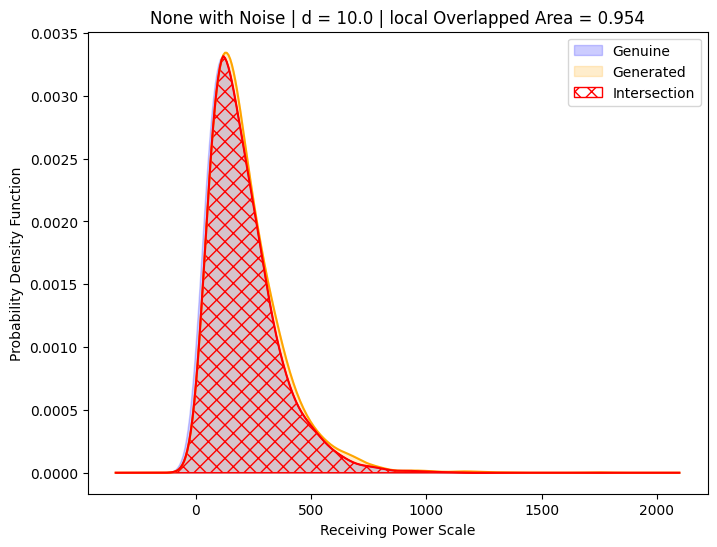

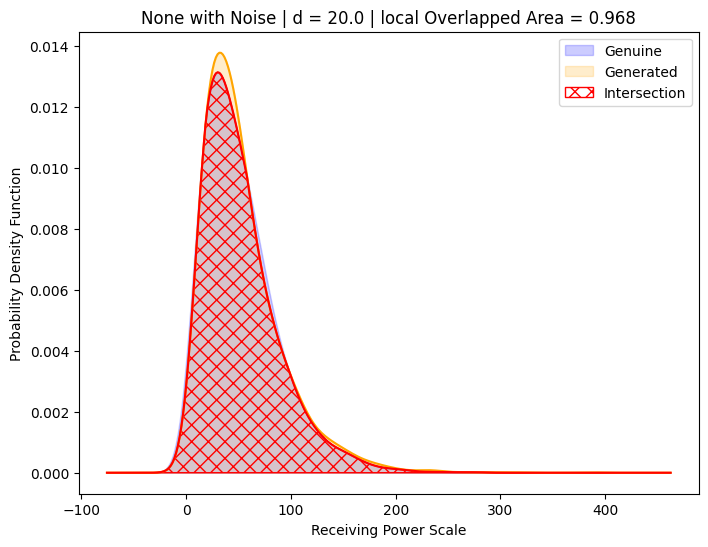

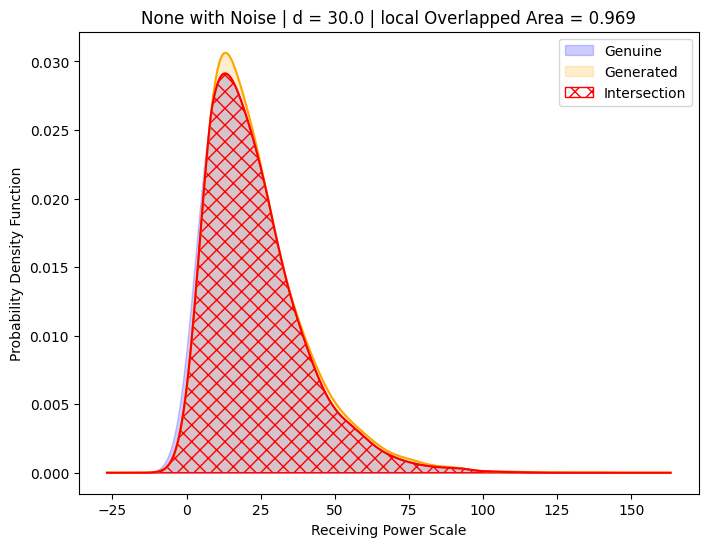

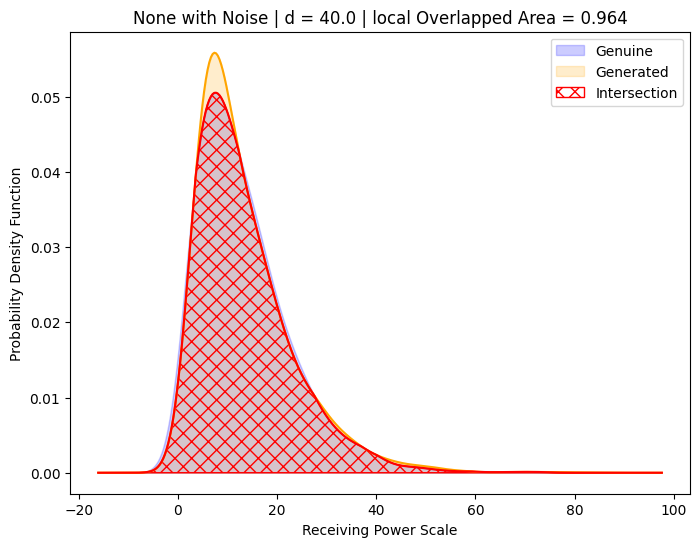

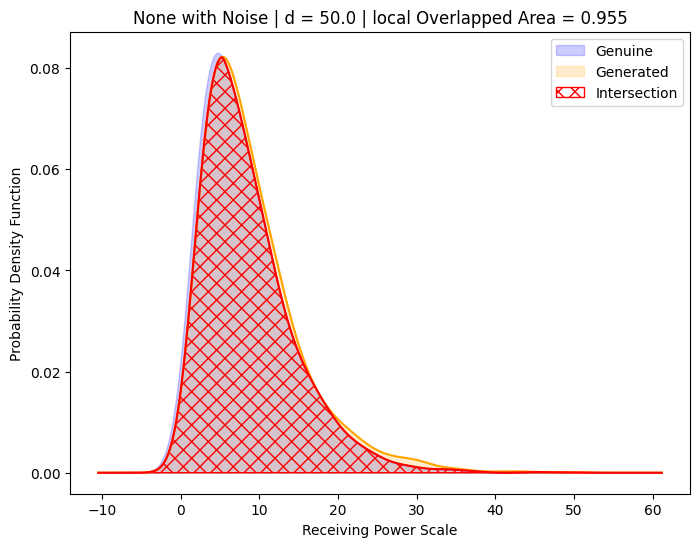

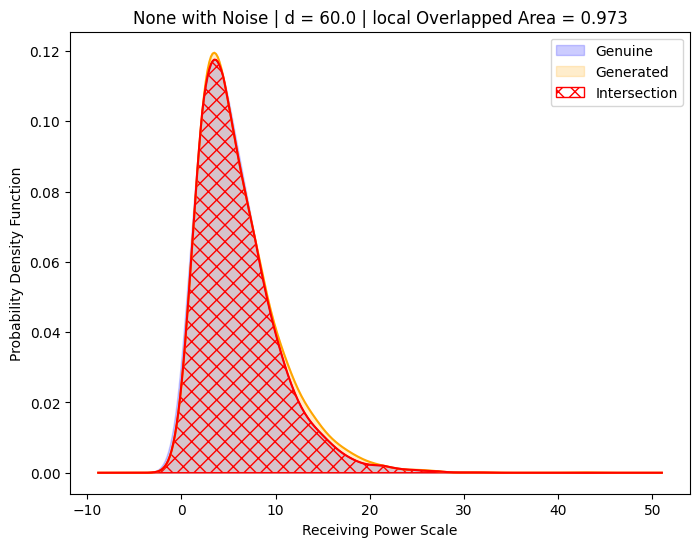

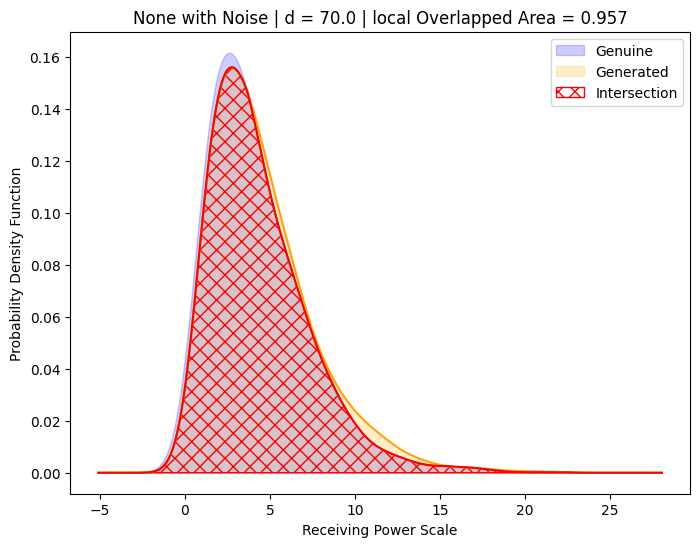

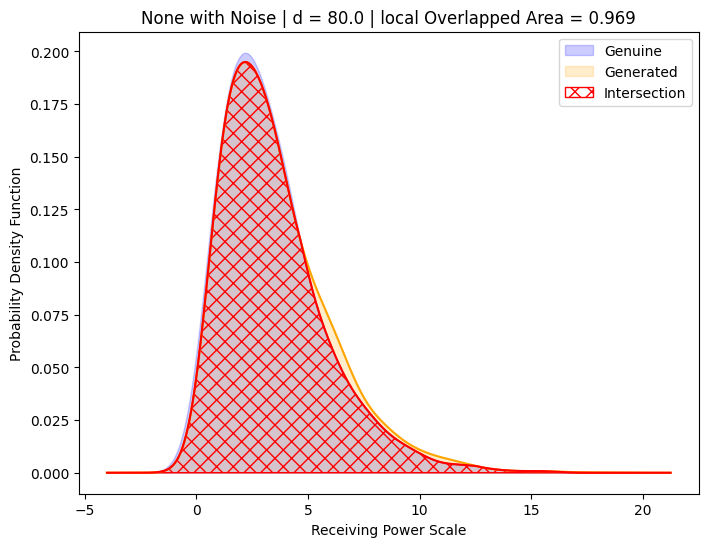

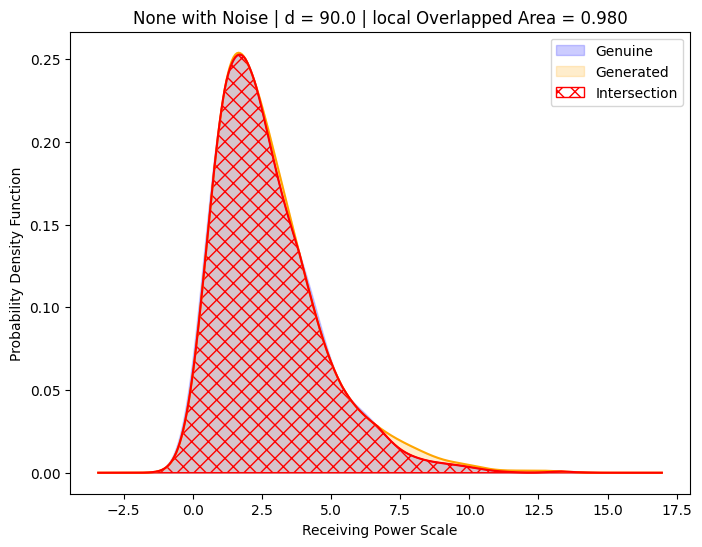

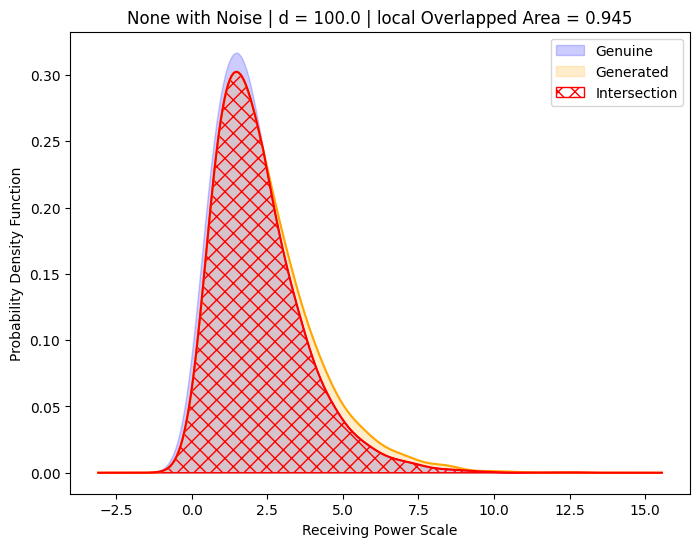

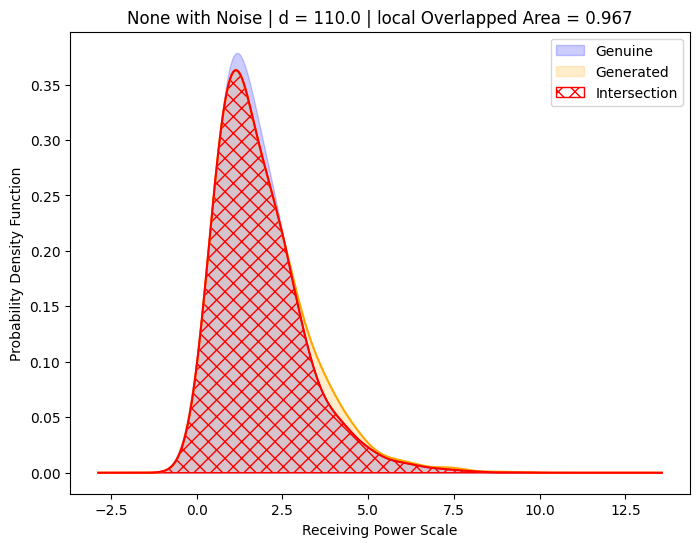

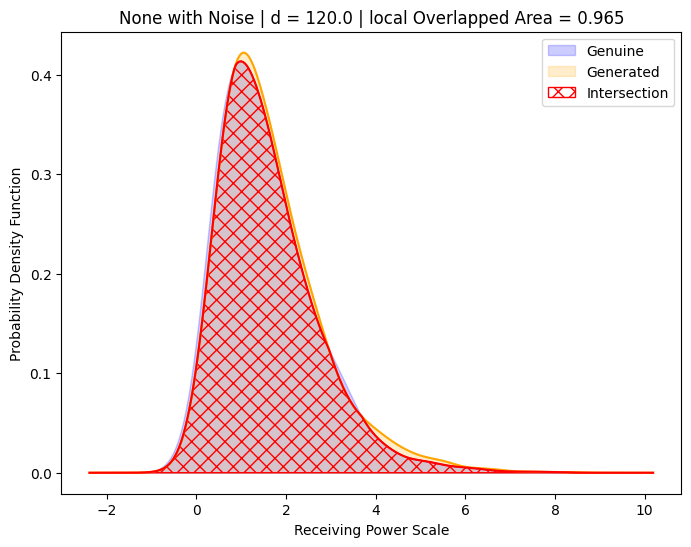

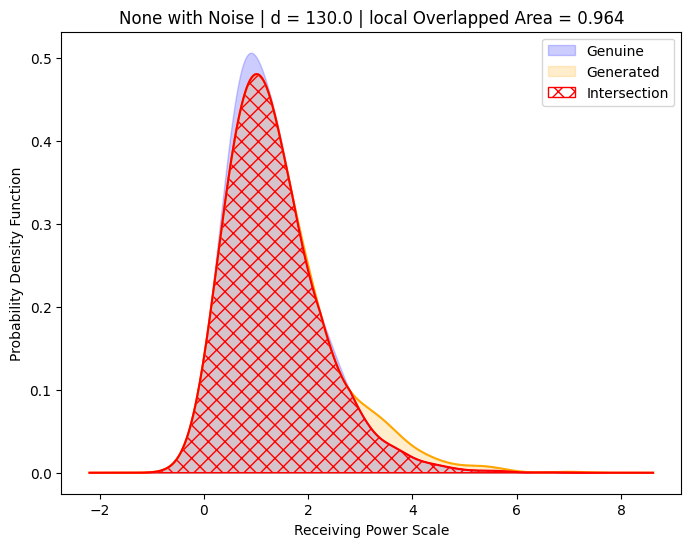

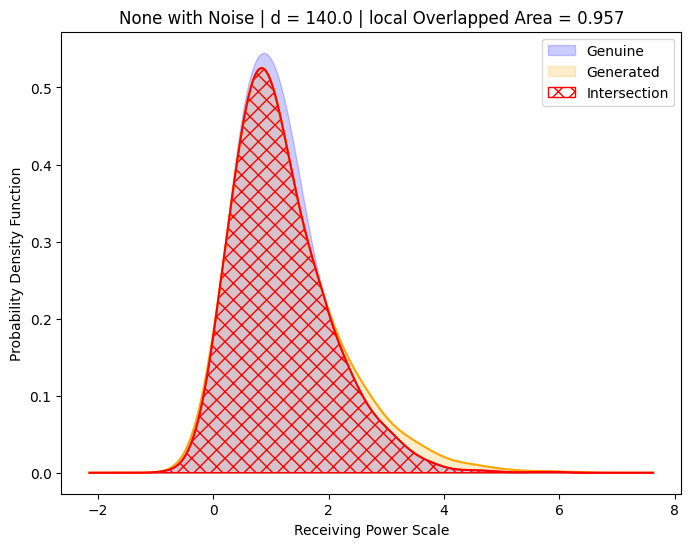

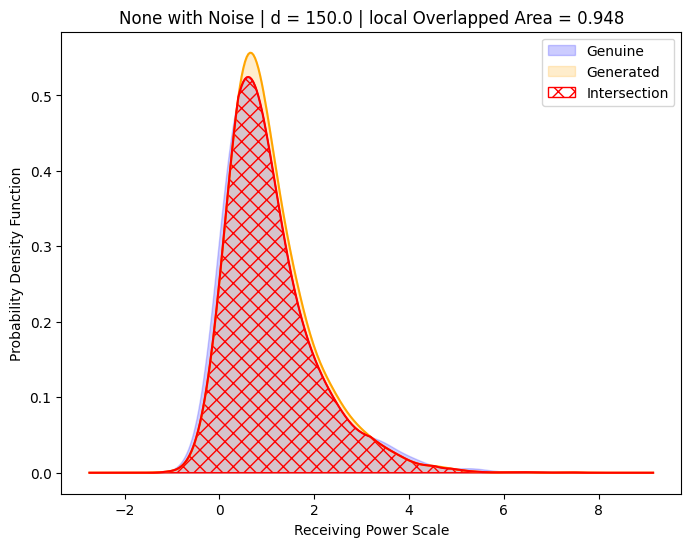

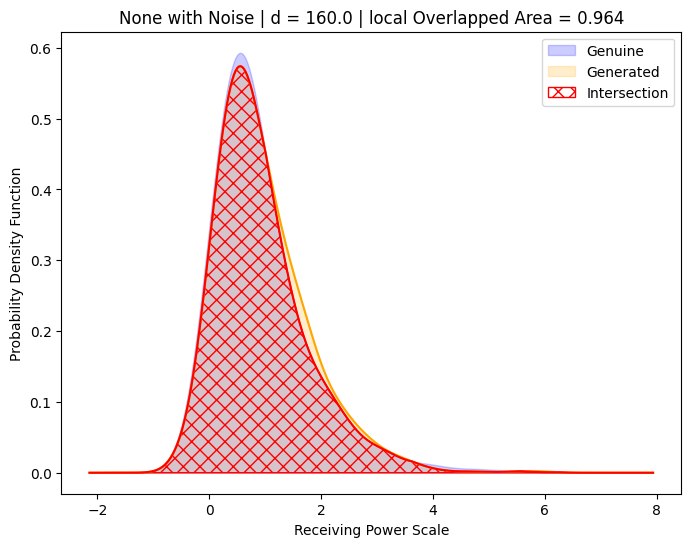

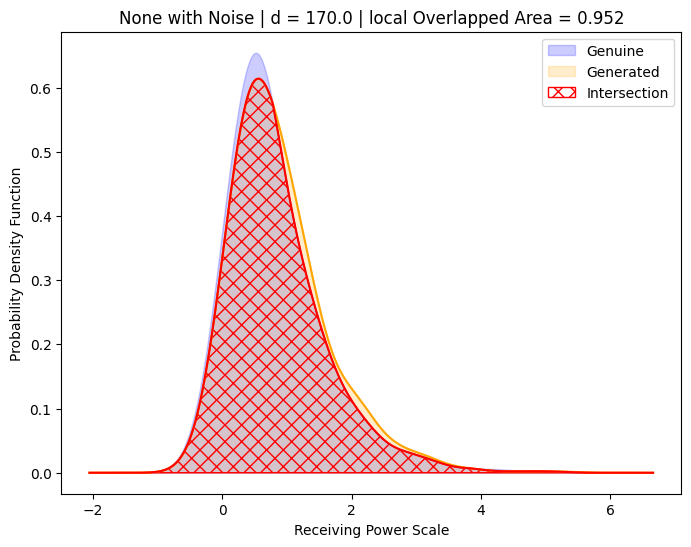

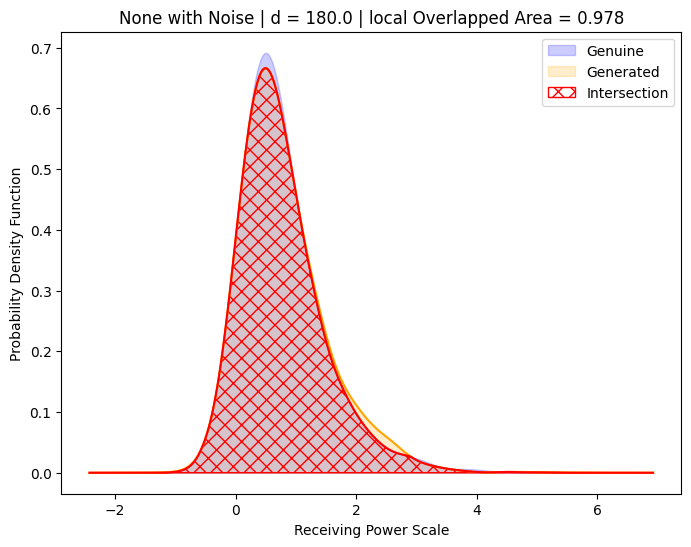

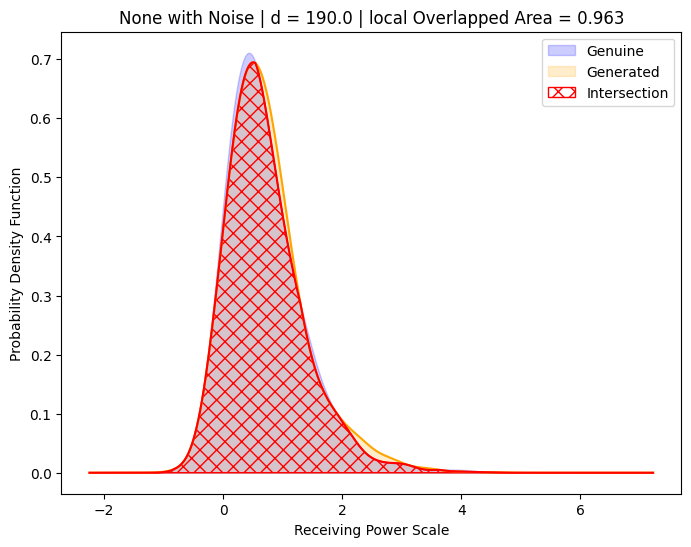

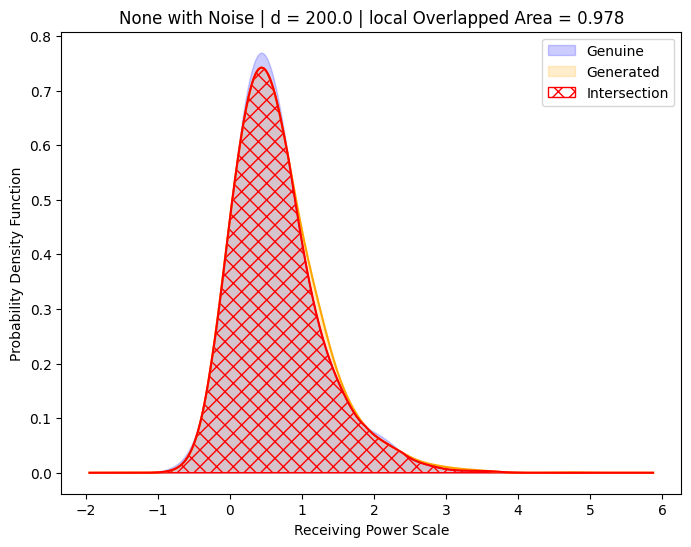

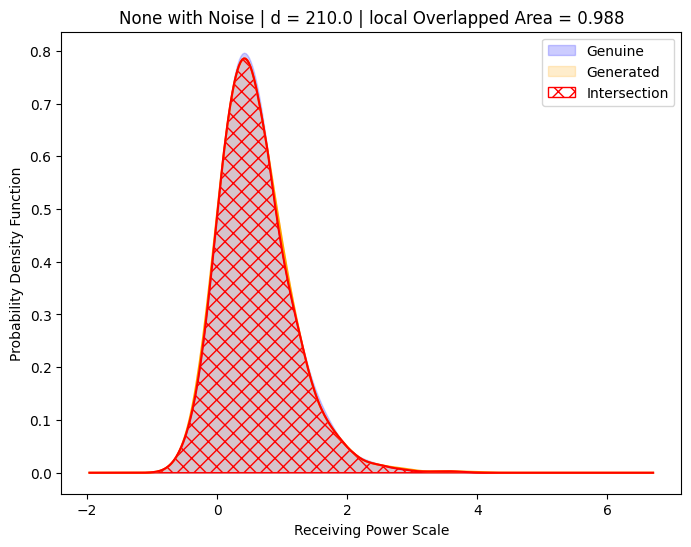

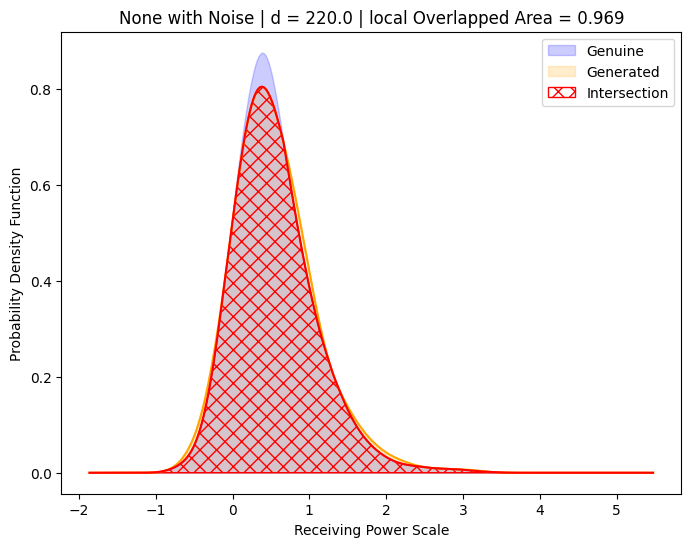

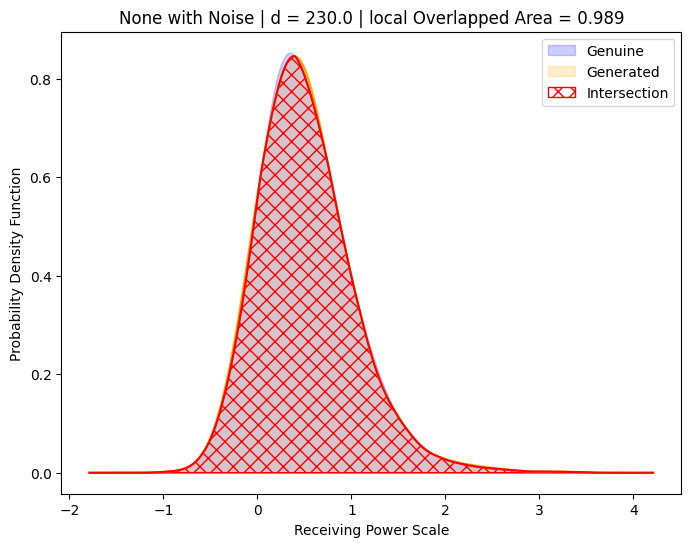

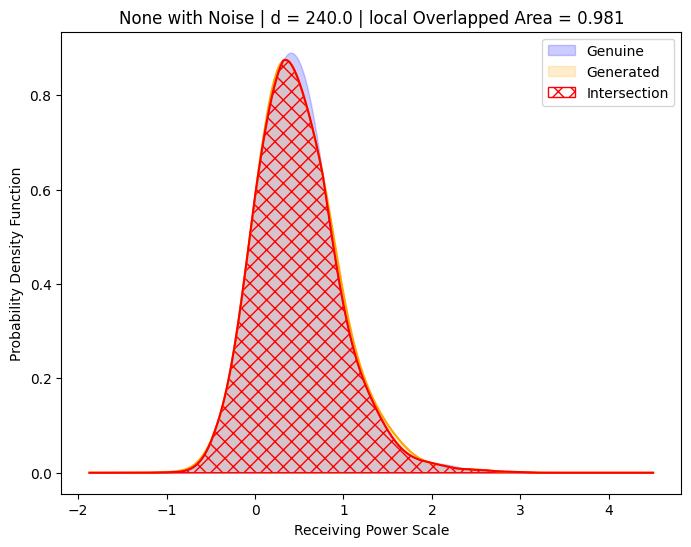

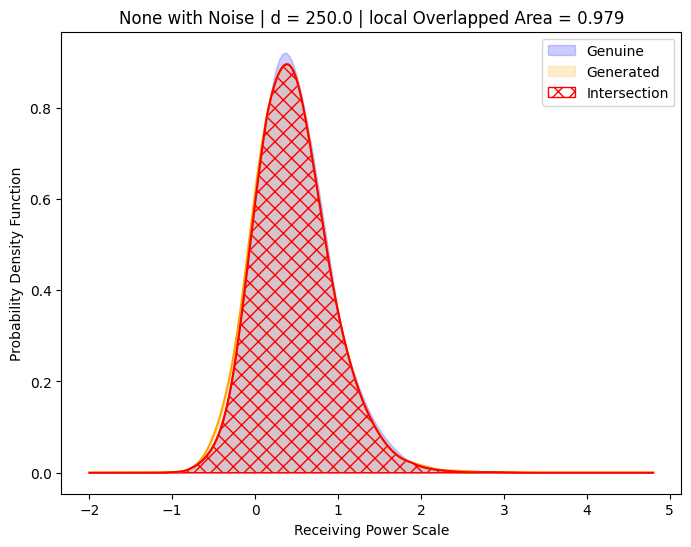

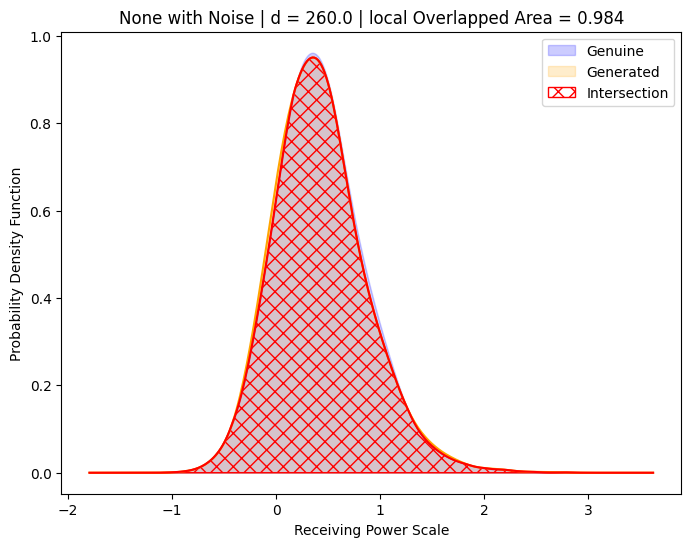

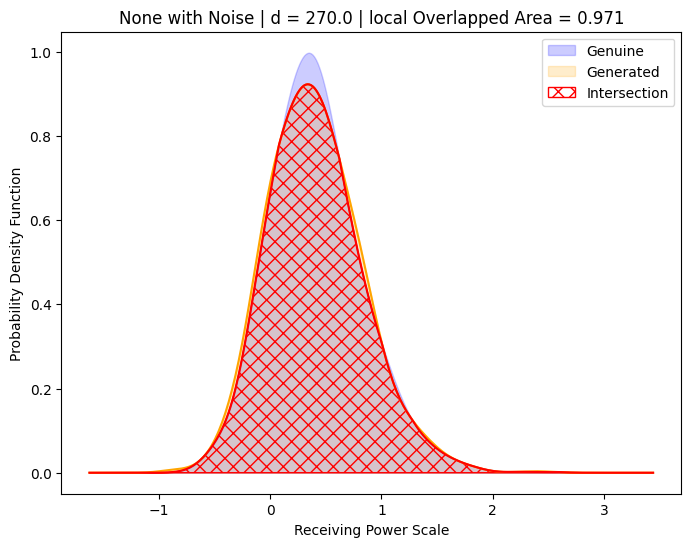

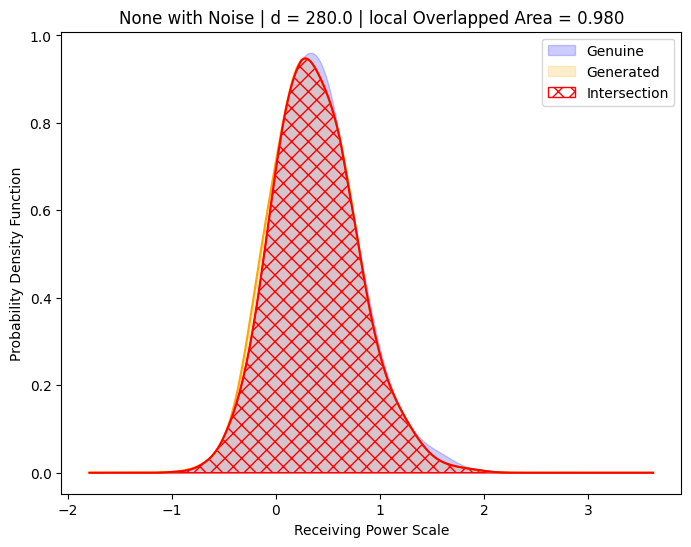

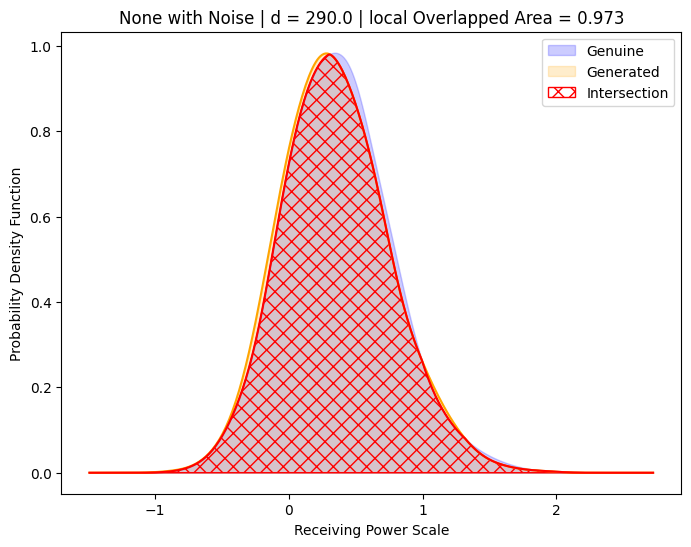

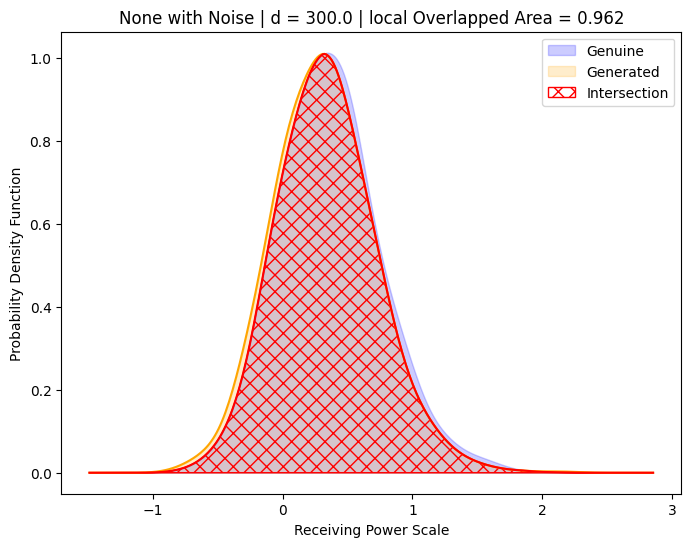

In [15]:
df_n_e1_b_oa = evaluations.evaluation_OA(
    df_to_evaluate=df_n_e1_b_test_back_scaled,
    name_model=None,
    dir_main_to_save=f"./evaluations",
    show_plot=True,
    to_save=False,
)

In [16]:
df_n_e1_b_oa

d  area_overlapped
0    0.0         0.954446
1    1.0         0.968331
2    2.0         0.968736
3    3.0         0.964293
4    4.0         0.955235
5    5.0         0.972757
6    6.0         0.957118
7    7.0         0.968603
8    8.0         0.979799
9    9.0         0.944544
10  10.0         0.966555
11  11.0         0.964679
12  12.0         0.963533
13  13.0         0.957328
14  14.0         0.947968
15  15.0         0.963706
16  16.0         0.952164
17  17.0         0.977644
18  18.0         0.963396
19  19.0         0.977605
20  20.0         0.988487
21  21.0         0.968698
22  22.0         0.988814
23  23.0         0.981148
24  24.0         0.978867
25  25.0         0.984034
26  26.0         0.971201
27  27.0         0.979613
28  28.0         0.972992
29  29.0         0.961841

## Median Nagami

In [17]:
median_e1 = df_whole_n_e1.shape[0]//2
median_version_n_e1 = df_whole_n_e1.sort_values(by='metric', ascending=False).iloc[[median_e1]]['version'].values[0]
median_epoch_n_e1 = df_whole_n_e1.sort_values(by='metric', ascending=False).iloc[[median_e1]]['epoch'].values[0]
df_whole_n_e1.sort_values(by='metric', ascending=False).iloc[[median_e1]]

epoch     loss  val_loss   avg_oa       std  version    metric
126      7  0.11676  0.114796  0.96088  0.015638        8  0.929604

In [18]:
############################
### ATTENTION PLEASE!!!!!!##
############################
# This should be replaced to '../saved_models/Nakagami_median.h5'
median_version_n_e1, median_epoch_n_e1

(8, 7)

In [19]:
df_n_e1_m_test_back_scaled = df_n_test_back_scaled.copy()

model_mdn = tf.keras.models.load_model(
    f"{dir_n_e1}/{median_version_n_e1}/{dir_sub_n_e1}/{dir_sub_n_e1}_ep_{str(median_epoch_n_e1).zfill(2)}.h5", 
    custom_objects={"mdn_loss":model.model_MDN().mdn_loss}
)

predicted_n_e1_m_data = model_mdn.predict(df_n_e1_m_test_back_scaled['d'])
df_n_e1_m_test_back_scaled['generated'] = utils.inverse_log_transform_n(np.squeeze(predicted_n_e1_m_data))

3125/3125 [==============================] - 3s 1ms/step


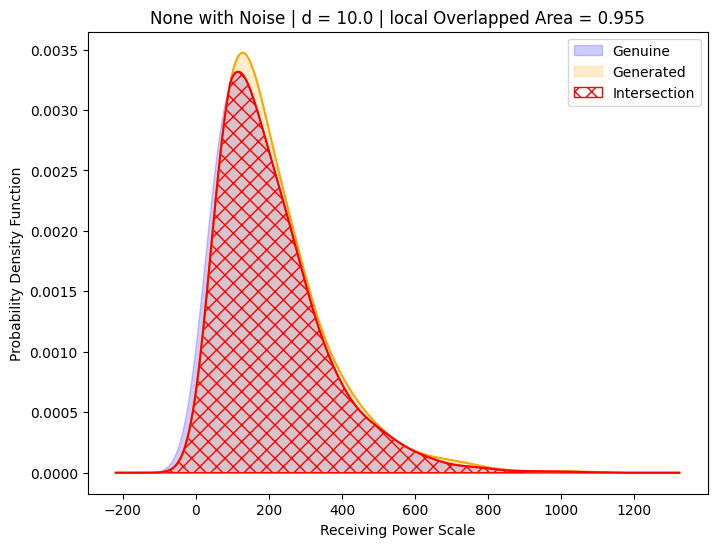

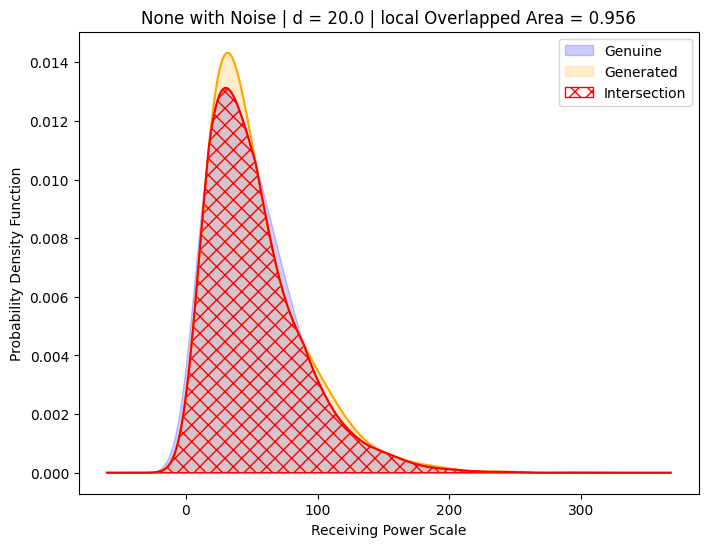

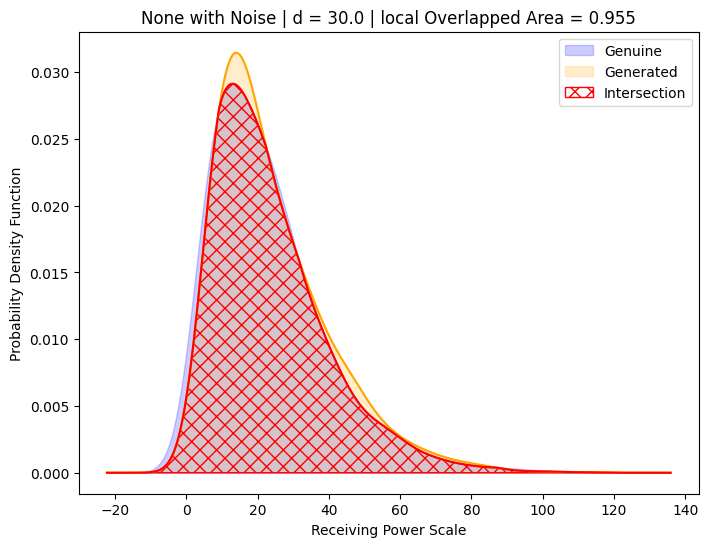

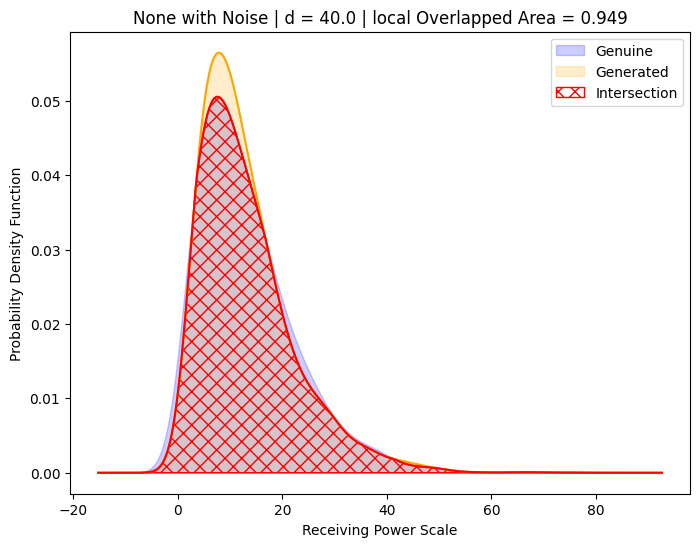

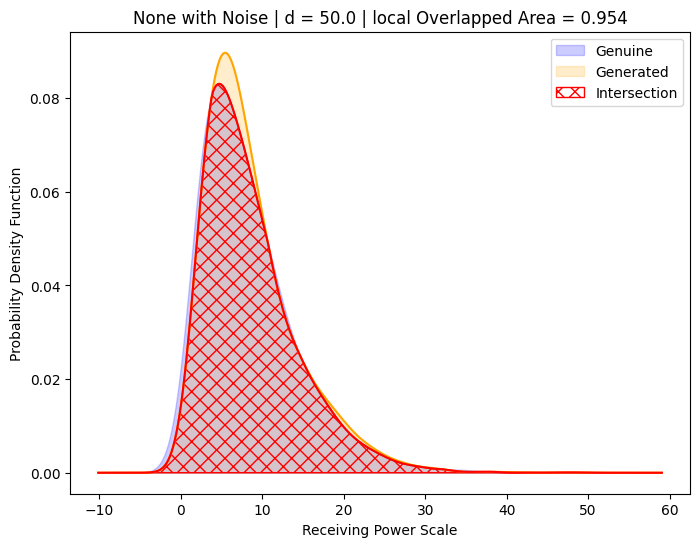

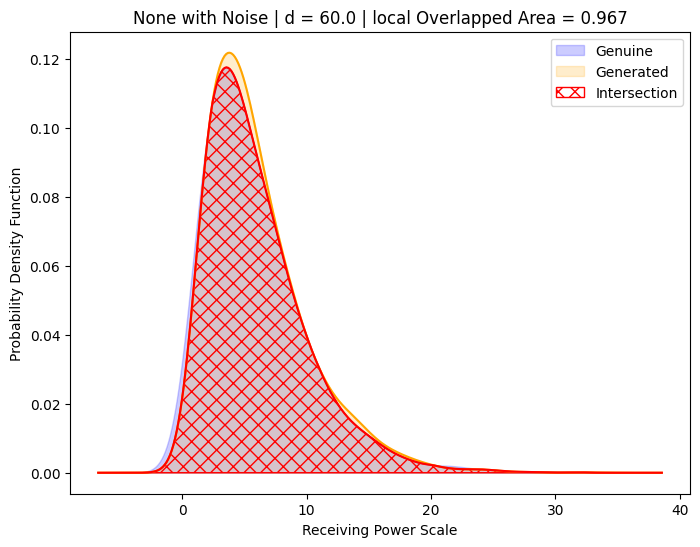

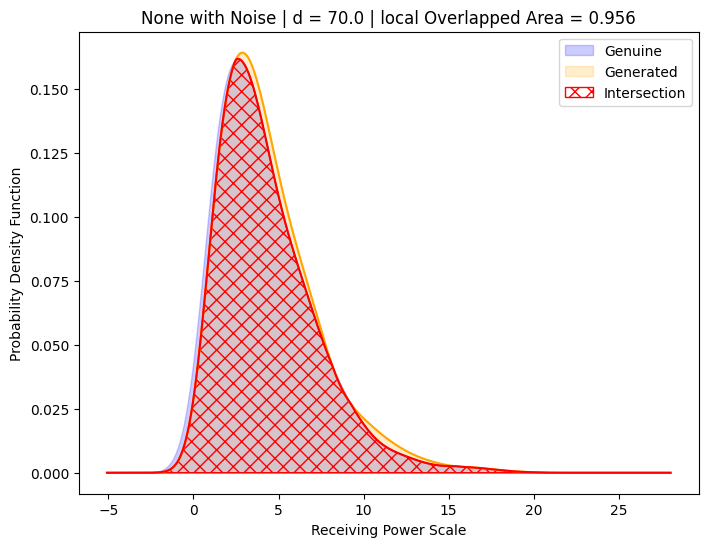

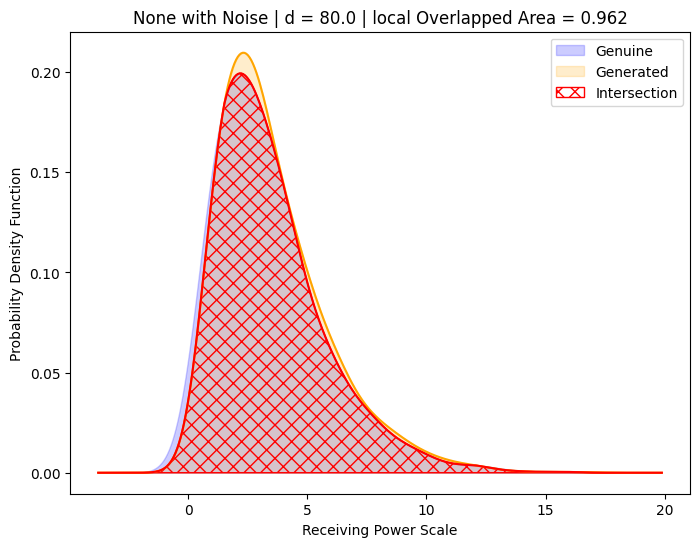

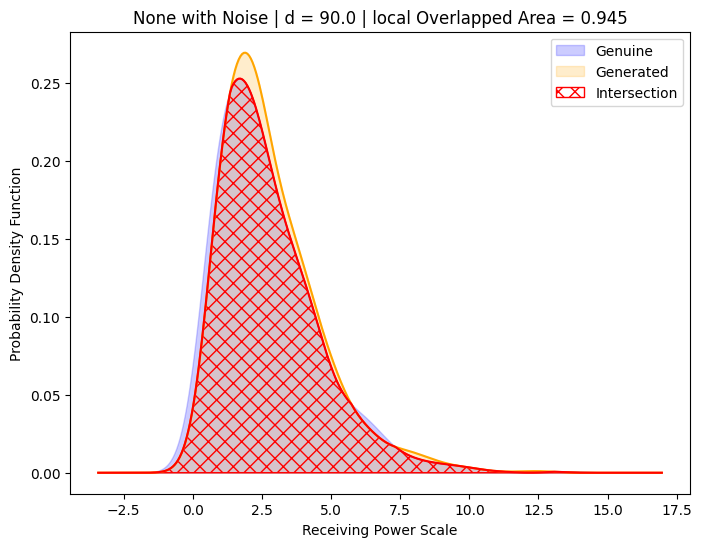

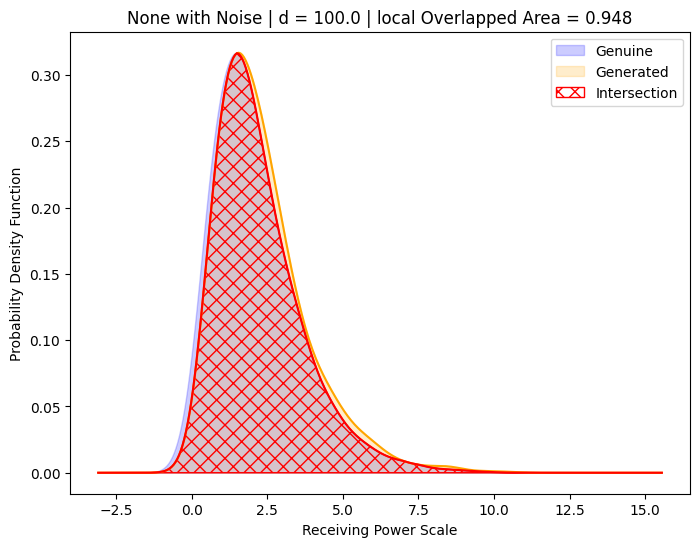

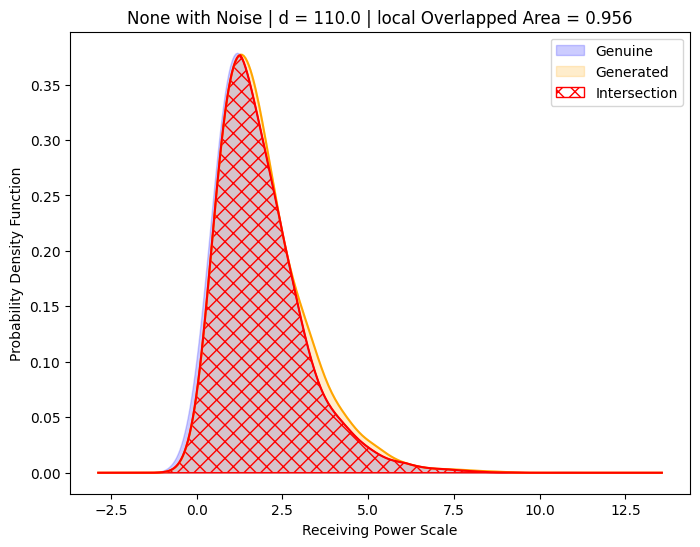

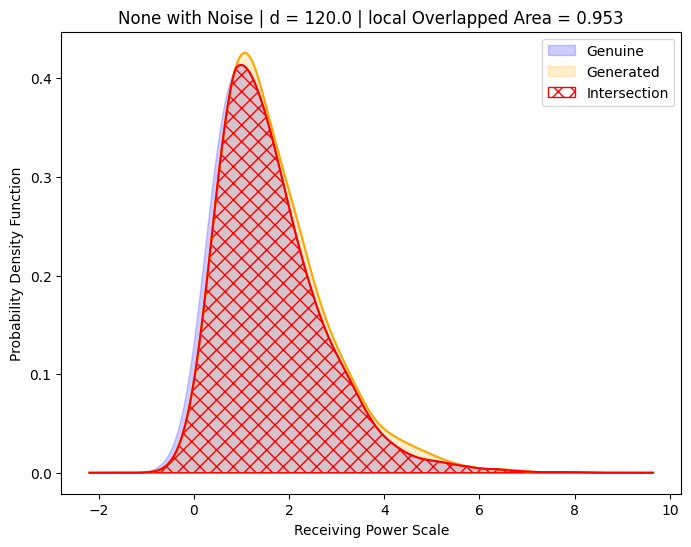

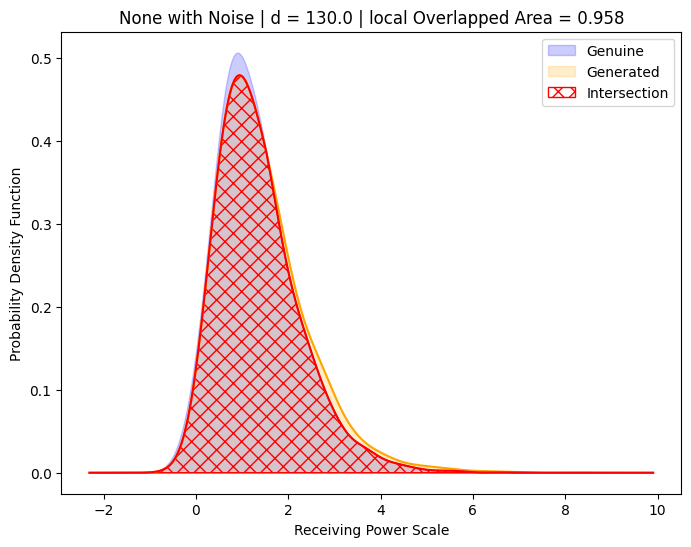

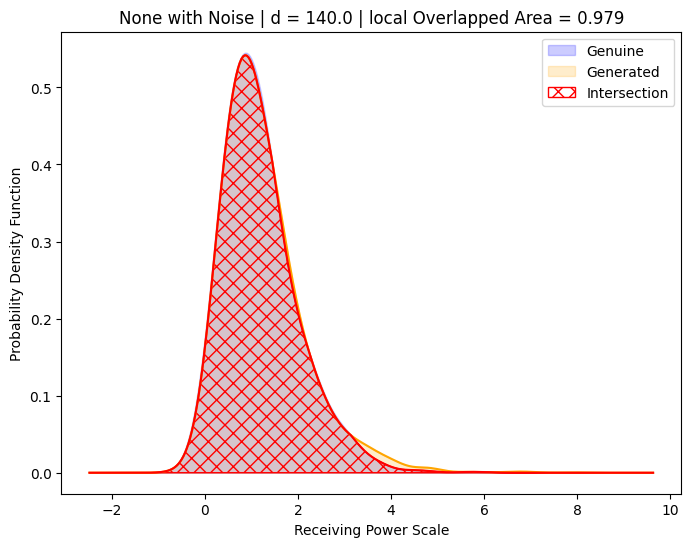

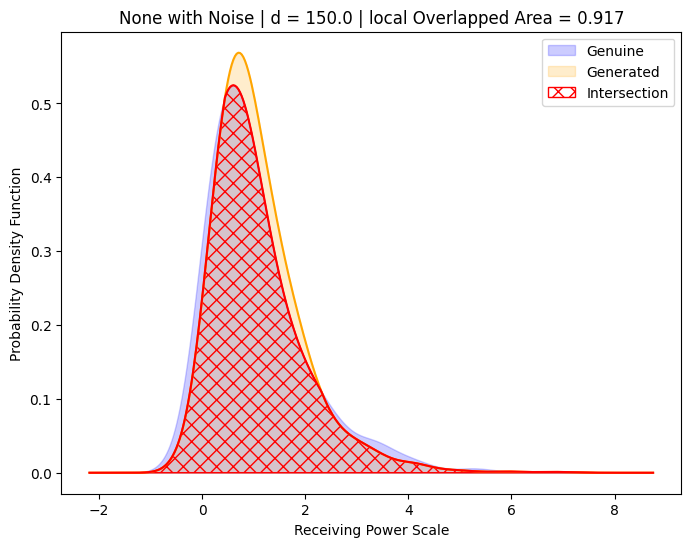

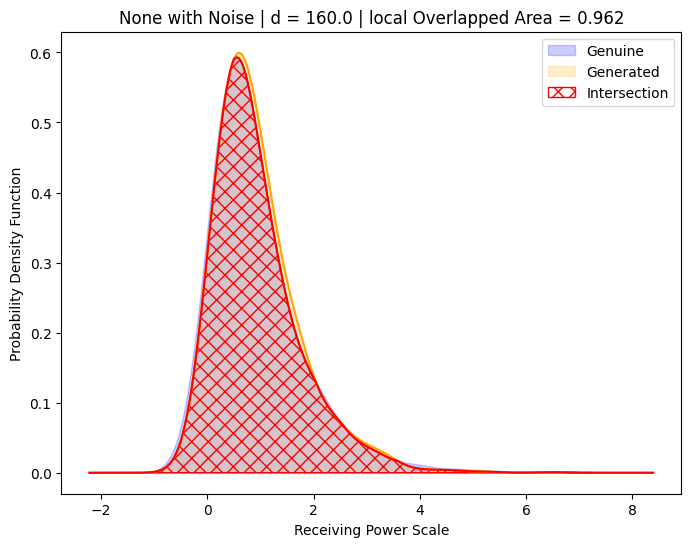

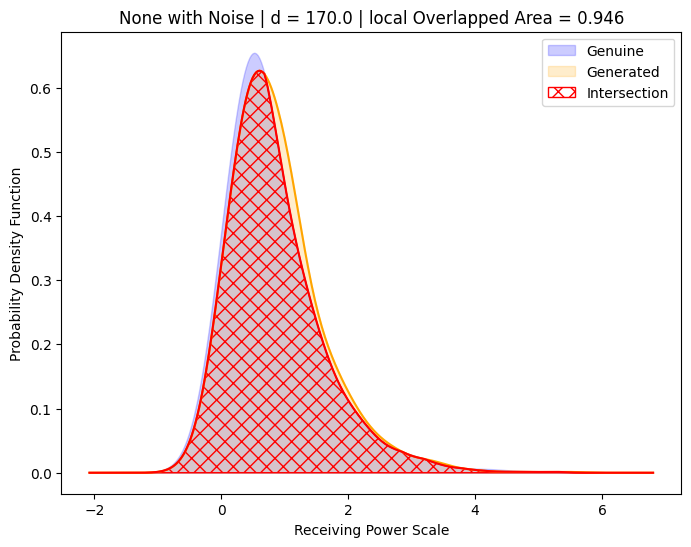

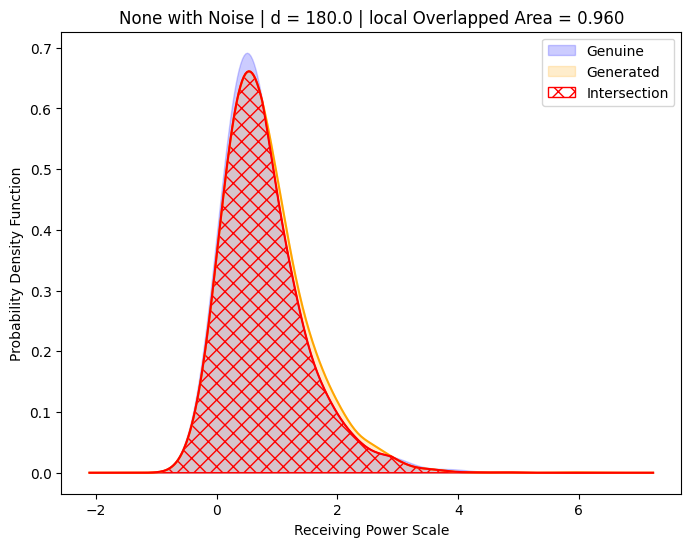

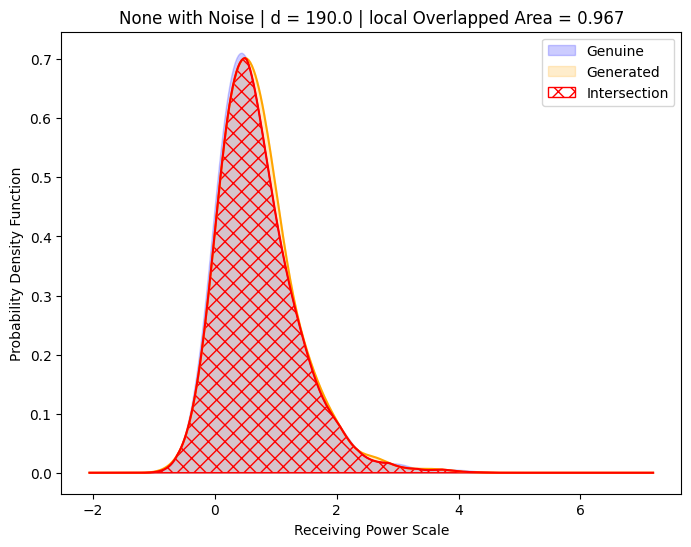

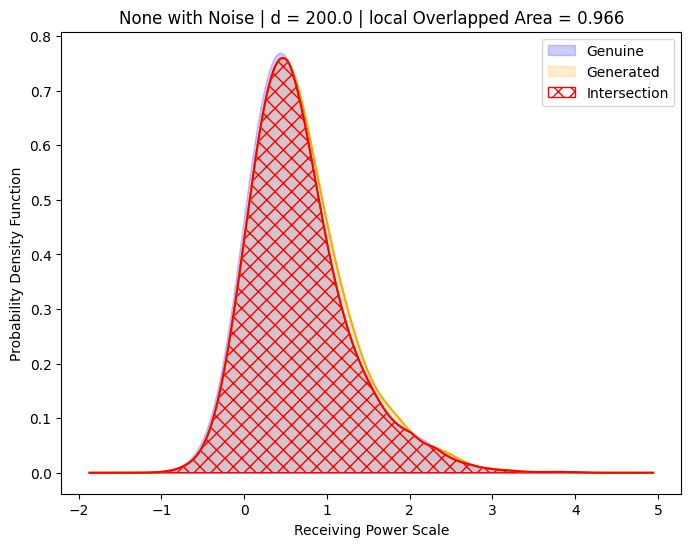

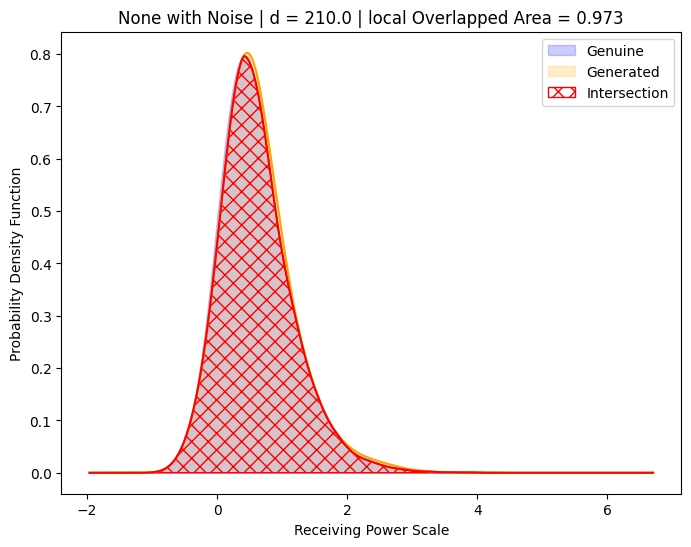

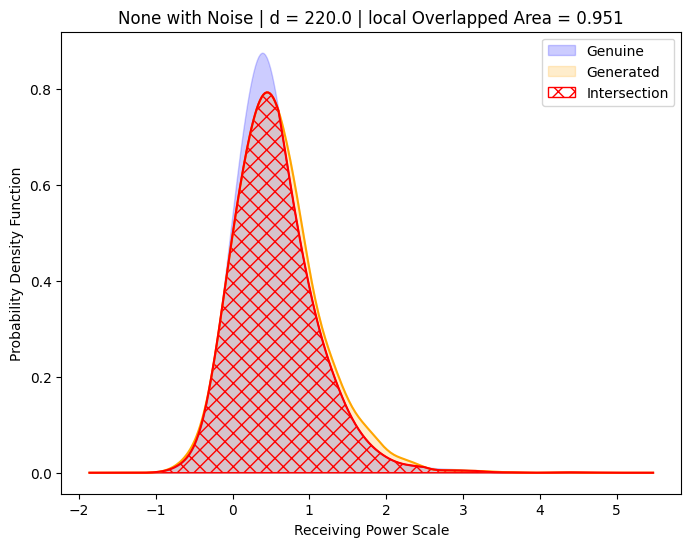

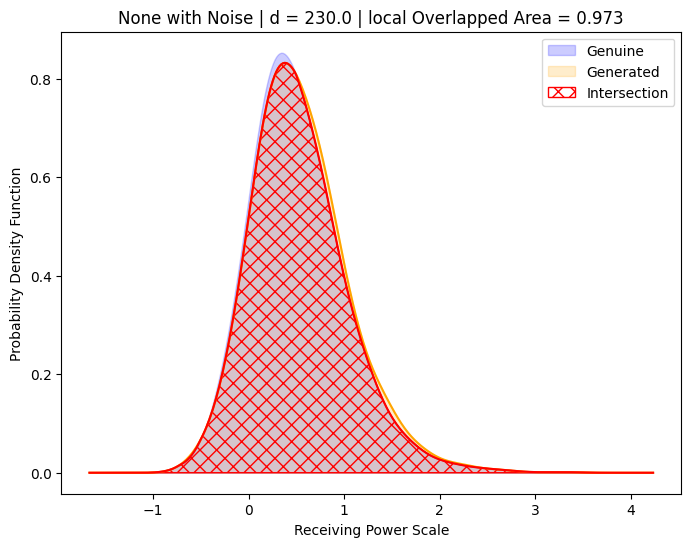

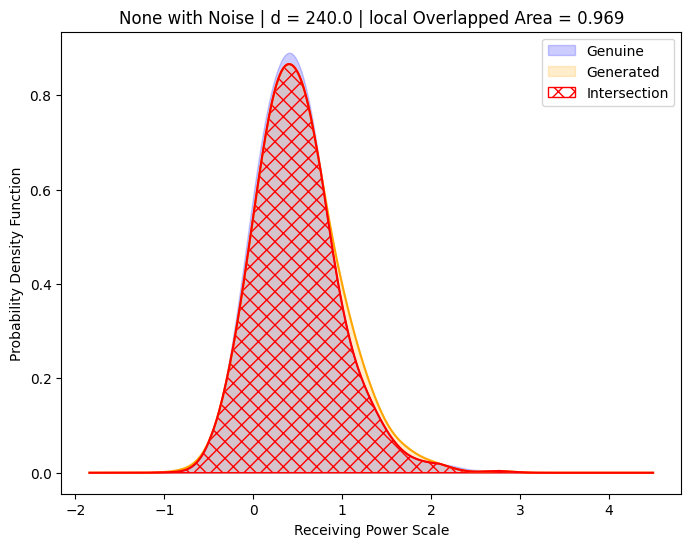

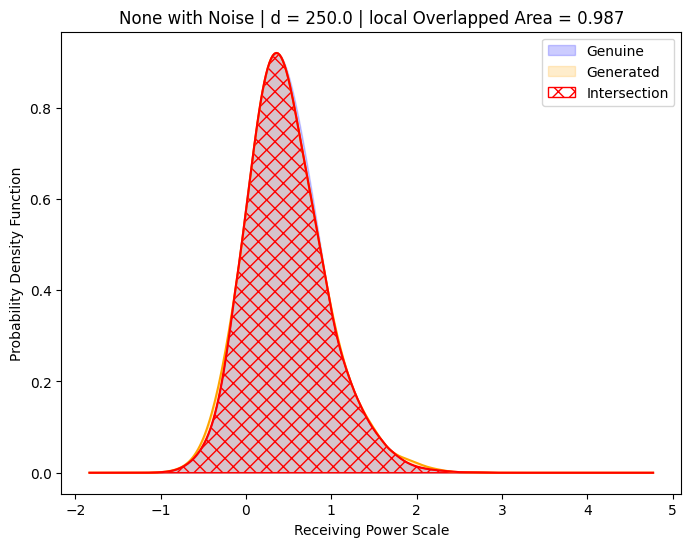

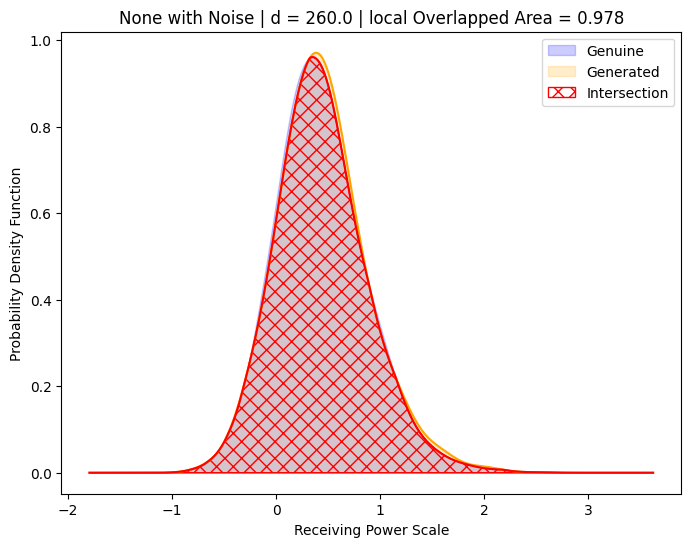

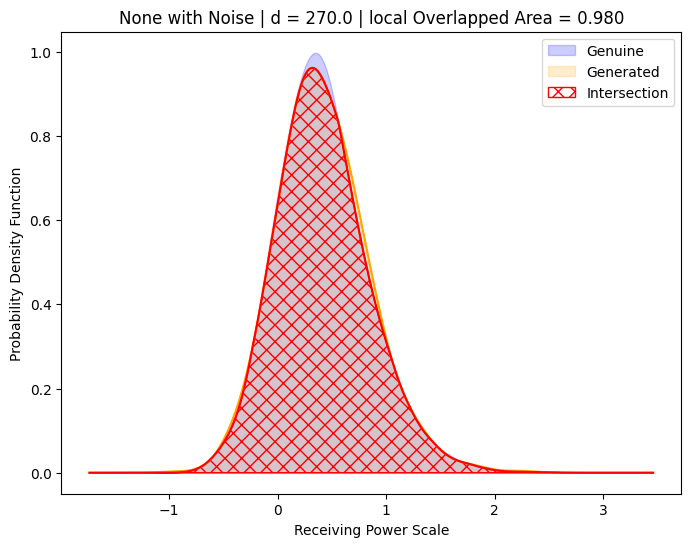

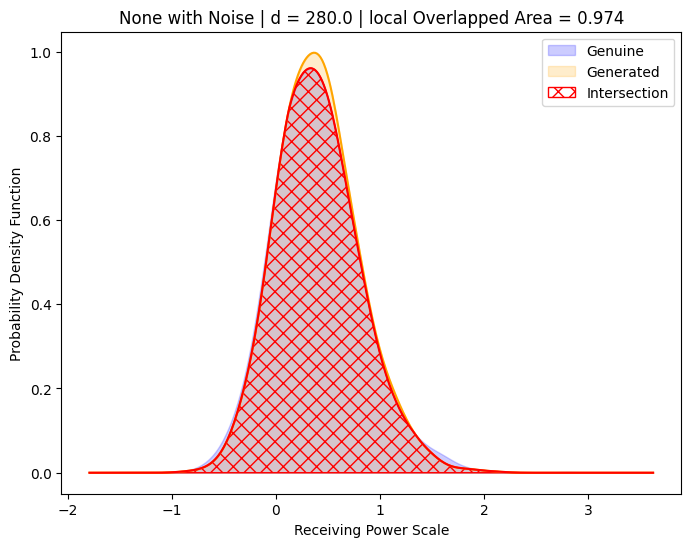

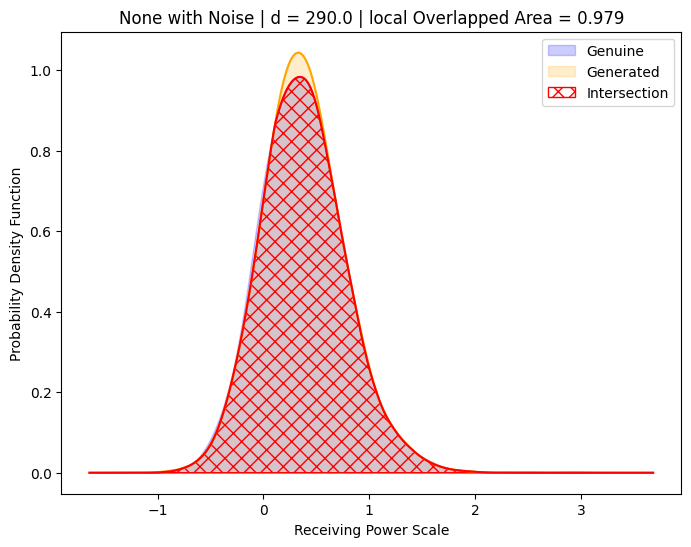

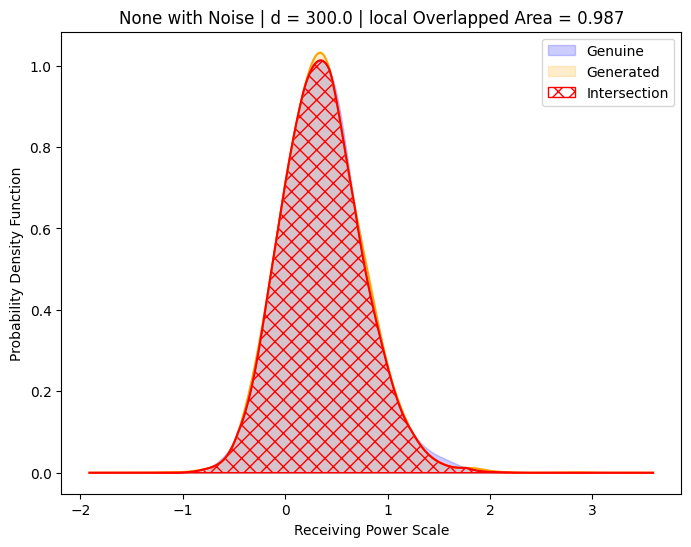

In [20]:
df_n_e1_m_oa = evaluations.evaluation_OA(
    df_to_evaluate=df_n_e1_m_test_back_scaled,
    name_model=None,
    dir_main_to_save=f"./evaluations",
    show_plot=True,
    to_save=False,
)

In [21]:
df_n_e1_m_oa['area_overlapped'].mean()

0.9621393606448707

In [22]:
df_n_e1_m_oa

d  area_overlapped
0    0.0         0.955141
1    1.0         0.956483
2    2.0         0.955078
3    3.0         0.949195
4    4.0         0.953739
5    5.0         0.966593
6    6.0         0.955983
7    7.0         0.961535
8    8.0         0.945248
9    9.0         0.947814
10  10.0         0.956025
11  11.0         0.953350
12  12.0         0.958447
13  13.0         0.979051
14  14.0         0.917464
15  15.0         0.961781
16  16.0         0.946263
17  17.0         0.960327
18  18.0         0.967089
19  19.0         0.966437
20  20.0         0.972800
21  21.0         0.950601
22  22.0         0.973411
23  23.0         0.968999
24  24.0         0.986626
25  25.0         0.978459
26  26.0         0.980348
27  27.0         0.974446
28  28.0         0.978915
29  29.0         0.986533

# Fine the best Nakagami e2 == noise=0.01

In [23]:
con_n_e2_test = data.Nakagami(
        m_array=dict_n_test["m_array"],
        eta=dict_n_test["eta"],
        Pt=dict_n_test["Pt"],
        alpha=dict_n_test["alpha"],
        d_0=dict_n_test["d_0"],
        d_array=dict_n_test["d_array"],
        # noise=dict_n_test["noise"],
        noise=0.01,
        low=dict_n_test["low"],
        high=dict_n_test["high"],
    ) 
test_n_e2_data, test_n_e2_condition, test_n_e2_indices = con_n_e2_test.generate(data_size_test)
df_n_e2_test_back_scaled = pd.DataFrame(np.hstack((test_n_e2_data, test_n_e2_indices,)), columns=['genuine', 'd'])

In [24]:
name_dir_n_e2 = 'Nakagami_e2'
dir_sub_n_e2 = 'Nakagami'
dir_n_e2 = f"{dir_main}/{name_dir_n_e2}"

list_dir_csv_n_e2 = list()
for ep in range(max_iterations):
    list_dir_csv_n_e2.append(f"{dir_n_e2}/{ep}/{dir_sub_n_e2}/log.csv")

list_dir_csv_n_e2


['../saved_models/Nakagami_e2/0/Nakagami/log.csv',
 '../saved_models/Nakagami_e2/1/Nakagami/log.csv',
 '../saved_models/Nakagami_e2/2/Nakagami/log.csv',
 '../saved_models/Nakagami_e2/3/Nakagami/log.csv',
 '../saved_models/Nakagami_e2/4/Nakagami/log.csv',
 '../saved_models/Nakagami_e2/5/Nakagami/log.csv',
 '../saved_models/Nakagami_e2/6/Nakagami/log.csv',
 '../saved_models/Nakagami_e2/7/Nakagami/log.csv',
 '../saved_models/Nakagami_e2/8/Nakagami/log.csv',
 '../saved_models/Nakagami_e2/9/Nakagami/log.csv']

In [25]:
list_csv_n_e2 = list()
for version, local_dir in enumerate(list_dir_csv_n_e2):
    local_df_n_e2 = pd.read_csv(local_dir)
    local_df_n_e2['version'] = version
    list_csv_n_e2.append(local_df_n_e2)

list_csv_n_e2

[    epoch      loss  val_loss    avg_oa       std  version
 0       1  1.284799  0.504465  0.524295  0.187772        0
 1       2  0.346062 -0.070815  0.914339  0.019723        0
 2       3 -0.099404 -0.112637  0.949795  0.014211        0
 3       4 -0.109866 -0.114831  0.963438  0.012403        0
 4       5 -0.114646 -0.122688  0.962646  0.008784        0
 5       6 -0.120064 -0.123374  0.951954  0.011524        0
 6       7 -0.120576 -0.122557  0.943951  0.012223        0
 7       8 -0.115205 -0.122819  0.945988  0.012709        0
 8       9 -0.117307 -0.123722  0.946910  0.012747        0
 9      10 -0.120813 -0.121007  0.961183  0.013854        0
 10     11 -0.120483 -0.120519  0.936500  0.016357        0
 11     12 -0.120083 -0.123906  0.965799  0.014640        0
 12     13 -0.120328 -0.124423  0.954114  0.013253        0
 13     14 -0.120426 -0.123952  0.964950  0.013301        0
 14     15 -0.121436 -0.124977  0.955264  0.013066        0,
     epoch      loss  val_loss    avg_o

In [26]:
df_whole_n_e2 = pd.concat(list_csv_n_e2, axis=0).reset_index(drop=True)
df_whole_n_e2['metric'] = df_whole_n_e2['avg_oa'] - 2 * df_whole_n_e2['std']
df_whole_n_e2

epoch      loss  val_loss    avg_oa       std  version    metric
0        1  1.284799  0.504465  0.524295  0.187772        0  0.148750
1        2  0.346062 -0.070815  0.914339  0.019723        0  0.874893
2        3 -0.099404 -0.112637  0.949795  0.014211        0  0.921372
3        4 -0.109866 -0.114831  0.963438  0.012403        0  0.938633
4        5 -0.114646 -0.122688  0.962646  0.008784        0  0.945078
..     ...       ...       ...       ...       ...      ...       ...
145     11 -0.119525 -0.124130  0.957802  0.012269        9  0.933265
146     12 -0.119560 -0.121283  0.943872  0.014114        9  0.915643
147     13 -0.120267 -0.122618  0.956888  0.016703        9  0.923482
148     14 -0.119191 -0.122700  0.942204  0.012137        9  0.917929
149     15 -0.120221 -0.123913  0.953660  0.012202        9  0.929256

[150 rows x 7 columns]

In [27]:
df_whole_n_e2.groupby(by=['epoch']).mean()

loss  val_loss    avg_oa       std  version    metric
epoch                                                           
1      1.396877  0.389063  0.601927  0.153954      4.5  0.294019
2      0.213617 -0.025023  0.884358  0.054375      4.5  0.775609
3     -0.089185 -0.108589  0.948302  0.016731      4.5  0.914840
4     -0.085777 -0.109993  0.945085  0.018629      4.5  0.907828
5     -0.113278 -0.116231  0.950972  0.013915      4.5  0.923141
6     -0.116271 -0.116744  0.954812  0.013796      4.5  0.927219
7     -0.116764 -0.116213  0.949527  0.014115      4.5  0.921296
8     -0.117351 -0.117668  0.951956  0.013635      4.5  0.924686
9     -0.117448 -0.117889  0.949306  0.013776      4.5  0.921754
10    -0.118531 -0.118904  0.952836  0.013965      4.5  0.924906
11    -0.118031 -0.118756  0.951787  0.014569      4.5  0.922648
12    -0.119486 -0.118995  0.959971  0.012361      4.5  0.935248
13    -0.118699 -0.116885  0.947956  0.015193      4.5  0.917569
14    -0.119534 -0.119219  0.950948  0.013427      4.5  0.924093
15    -0.119682 -0.117776  0.952343  0.014761      4.5  0.922821

In [28]:
df_whole_n_e2.groupby(by=['epoch'])['avg_oa'].mean(), df_whole_n_e2.groupby(by=['epoch'])['avg_oa'].std()

(epoch
 1     0.601927
 2     0.884358
 3     0.948302
 4     0.945085
 5     0.950972
 6     0.954812
 7     0.949527
 8     0.951956
 9     0.949306
 10    0.952836
 11    0.951787
 12    0.959971
 13    0.947956
 14    0.950948
 15    0.952343
 Name: avg_oa, dtype: float64,
 epoch
 1     0.160103
 2     0.104104
 3     0.011591
 4     0.015794
 5     0.009006
 6     0.011090
 7     0.009724
 8     0.010262
 9     0.012839
 10    0.011595
 11    0.010783
 12    0.007571
 13    0.015877
 14    0.008317
 15    0.006399
 Name: avg_oa, dtype: float64)

In [29]:
df_whole_n_e2.groupby(by=['epoch']).apply(lambda x: x)

/tmp/ipykernel_794990/409989623.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_whole_n_e2.groupby(by=['epoch']).apply(lambda x: x)


epoch      loss  val_loss    avg_oa       std  version    metric
epoch                                                                      
1     0        1  1.284799  0.504465  0.524295  0.187772        0  0.148750
      15       1  1.310338  0.595401  0.618387  0.192623        1  0.233141
      30       1  1.295519 -0.029333  0.847381  0.057214        2  0.732954
      45       1  1.562868  0.291516  0.632223  0.120329        3  0.391564
      60       1  1.197845  0.106279  0.585976  0.209149        4  0.167679
...          ...       ...       ...       ...       ...      ...       ...
15    89      15 -0.116966 -0.118635  0.960039  0.011467        5  0.937105
      104     15 -0.120333 -0.113606  0.955792  0.023249        6  0.909293
      119     15 -0.120083 -0.116692  0.949669  0.013581        7  0.922506
      134     15 -0.119096 -0.117965  0.951467  0.016147        8  0.919172
      149     15 -0.120221 -0.123913  0.953660  0.012202        9  0.929256

[150 rows x 7 columns]

## Best Nakagami

In [30]:
# Best Nakagami Model
best_version_n_e2 = df_whole_n_e2.sort_values(by='metric', ascending=False).iloc[[0]]['version'].values[0]
best_epoch_n_e2 = df_whole_n_e2.sort_values(by='metric', ascending=False).iloc[[0]]['epoch'].values[0]
df_whole_n_e2.sort_values(by='metric', ascending=False)

epoch      loss  val_loss    avg_oa       std  version    metric
41      12 -0.118401 -0.118092  0.969249  0.010107        2  0.949035
42      13 -0.119147 -0.121727  0.964327  0.008597        2  0.947133
114     10 -0.118624 -0.117249  0.965918  0.009690        7  0.946538
117     13 -0.119148 -0.115906  0.965383  0.009912        7  0.945559
4        5 -0.114646 -0.122688  0.962646  0.008784        0  0.945078
..     ...       ...       ...       ...       ...      ...       ...
15       1  1.310338  0.595401  0.618387  0.192623        1  0.233141
105      1  1.470548  0.393023  0.510326  0.167975        7  0.174375
60       1  1.197845  0.106279  0.585976  0.209149        4  0.167679
0        1  1.284799  0.504465  0.524295  0.187772        0  0.148750
75       1  2.454522  1.155812  0.243430  0.173688        5 -0.103946

[150 rows x 7 columns]

In [31]:
best_version_n_e2, best_epoch_n_e2

(2, 12)

In [32]:
df_n_e2_test_back_scaled = df_n_e2_test_back_scaled.copy()
model_mdn = tf.keras.models.load_model(
    f"{dir_n_e2}/{best_version_n_e2}/{dir_sub_n_e2}/{dir_sub_n_e2}_ep_{str(best_epoch_n_e2).zfill(2)}.h5", 
    custom_objects={"mdn_loss":model.model_MDN().mdn_loss}
)

predicted_n_e2_data = model_mdn.predict(df_n_e2_test_back_scaled['d'])
df_n_e2_test_back_scaled['generated'] = utils.inverse_log_transform_n(np.squeeze(predicted_n_e2_data))

3125/3125 [==============================] - 3s 1ms/step


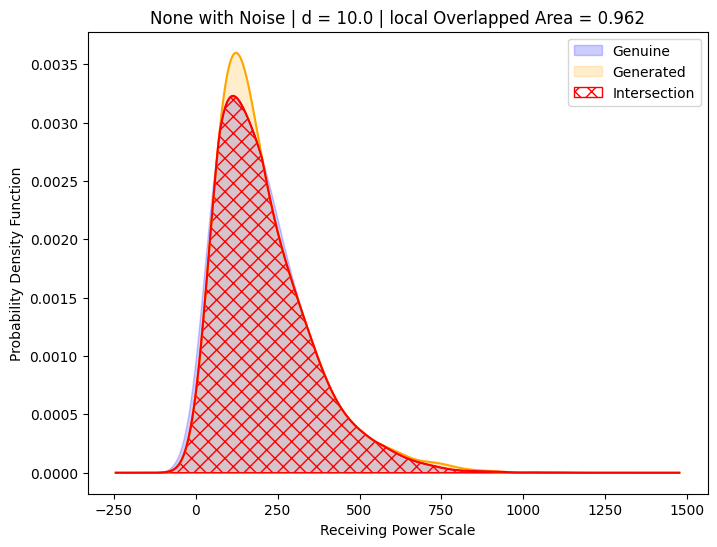

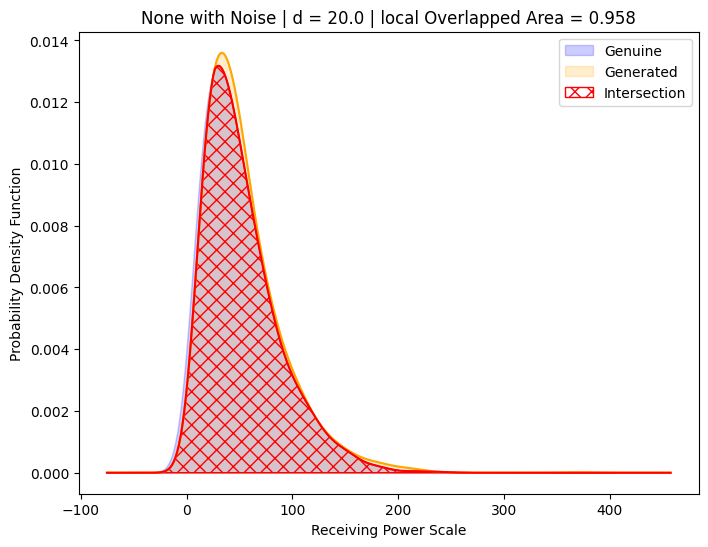

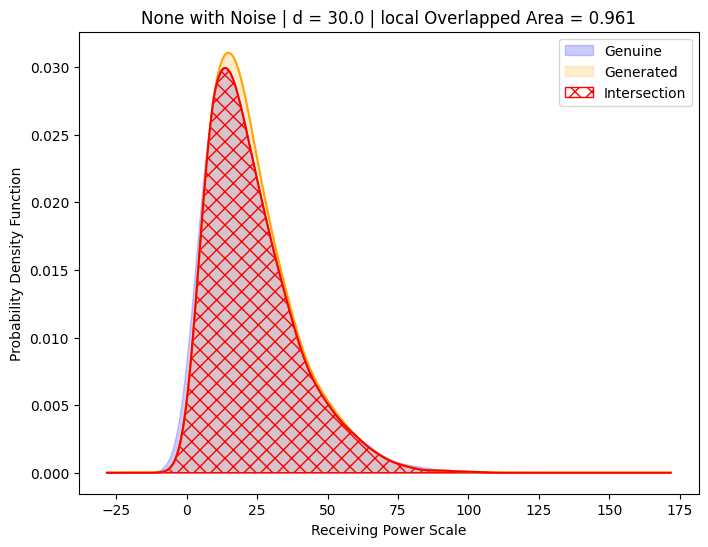

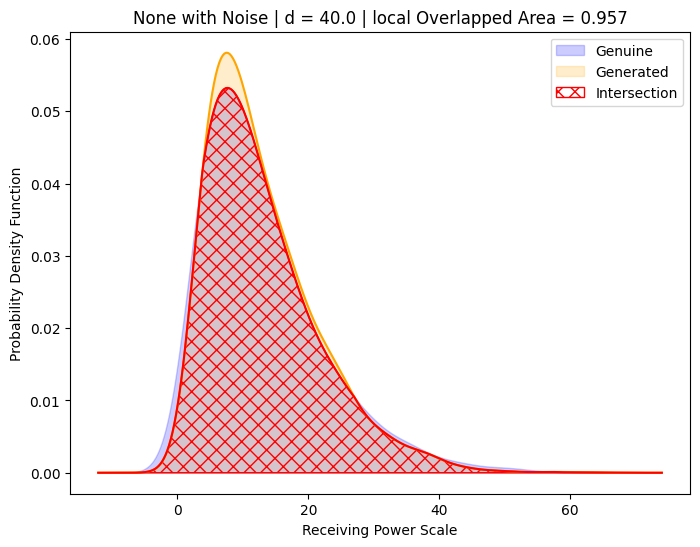

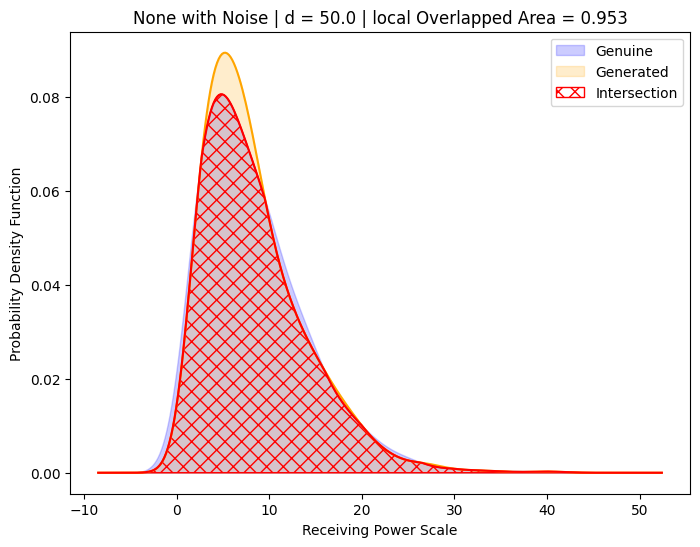

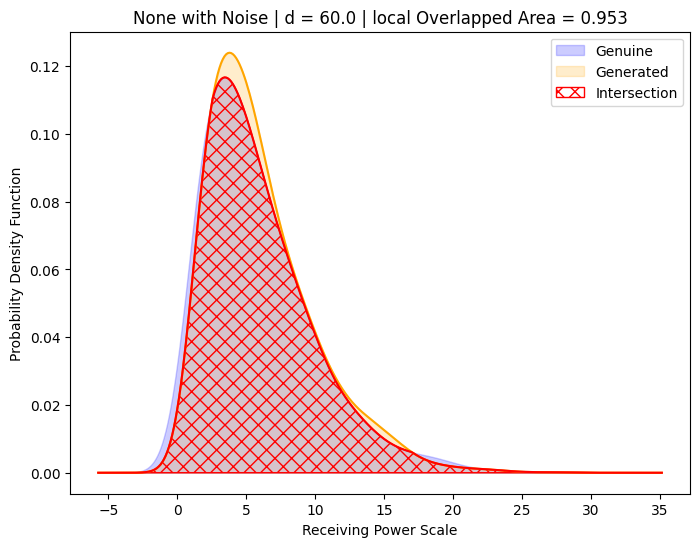

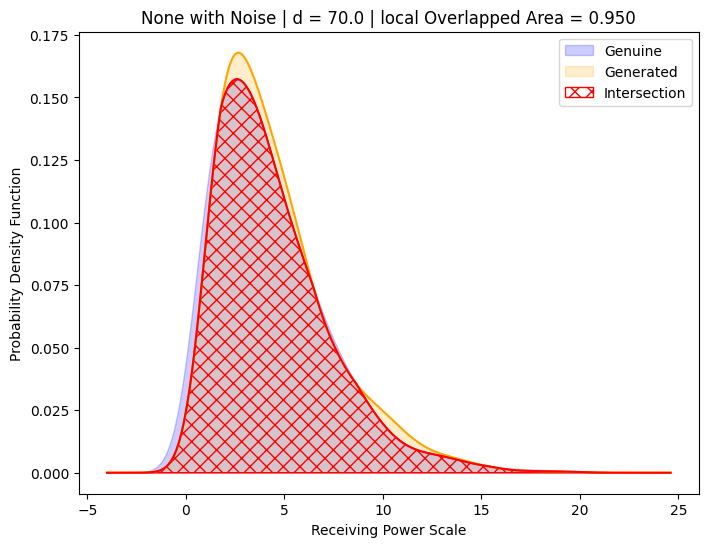

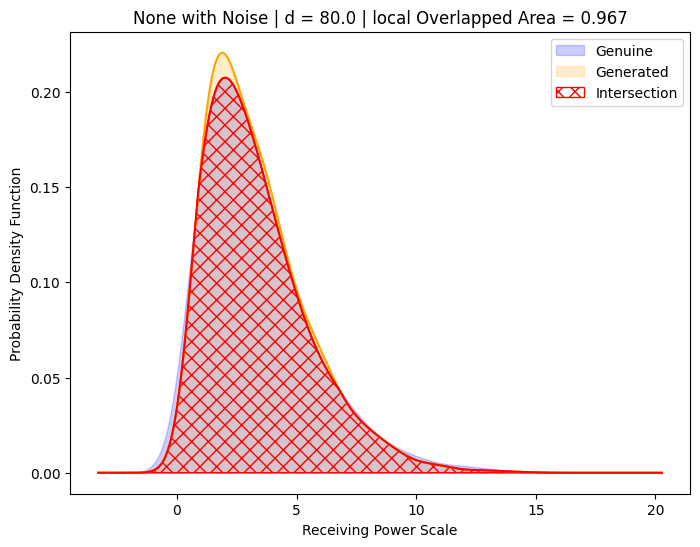

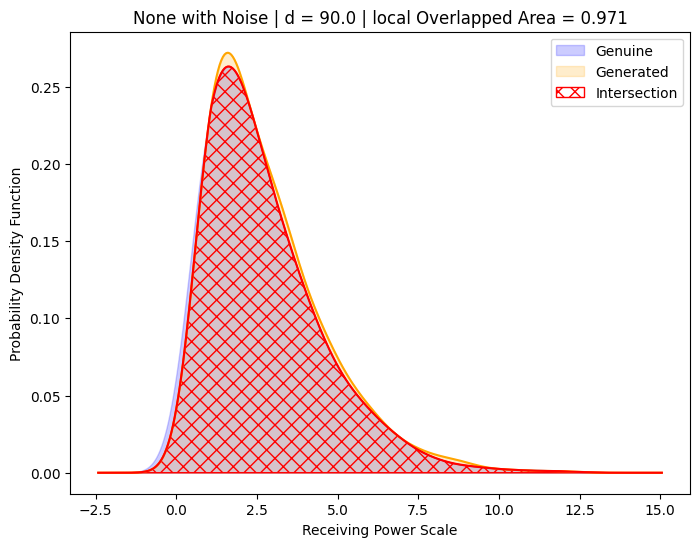

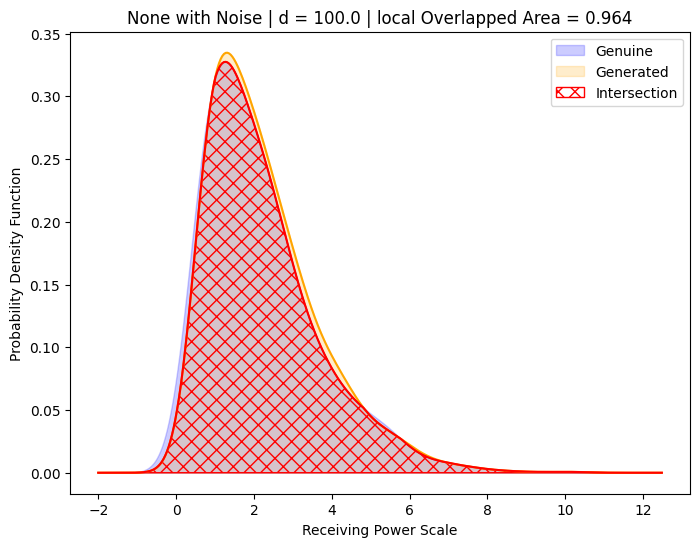

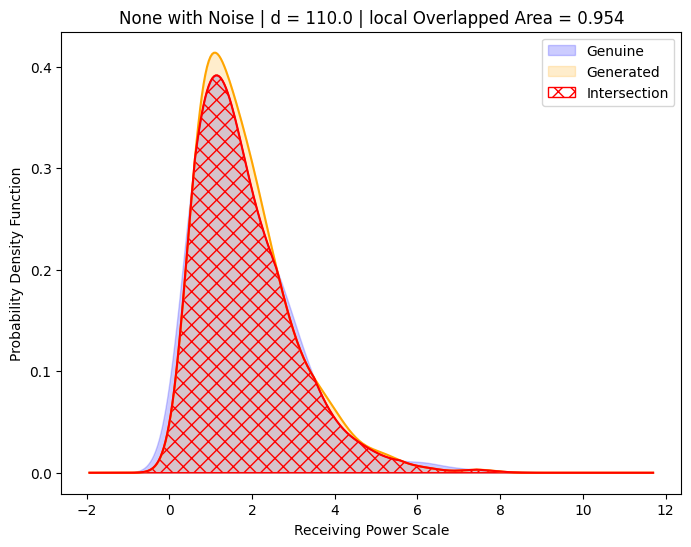

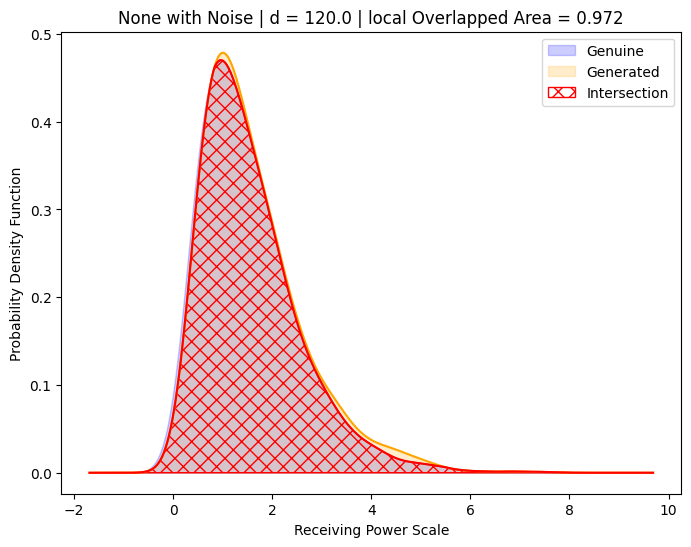

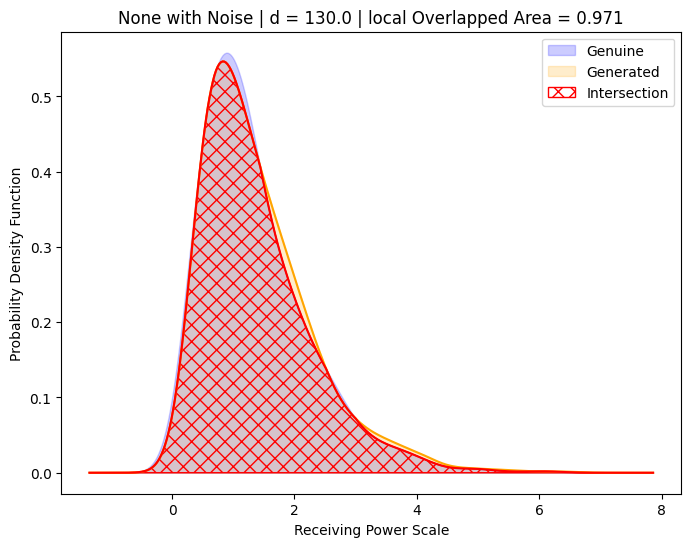

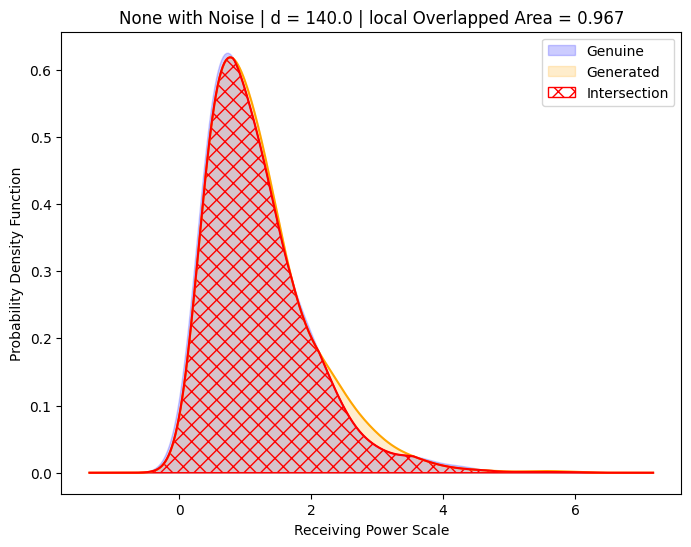

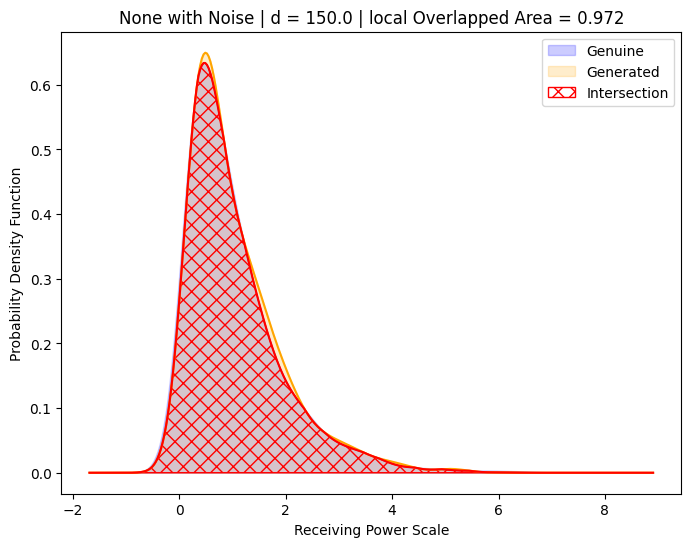

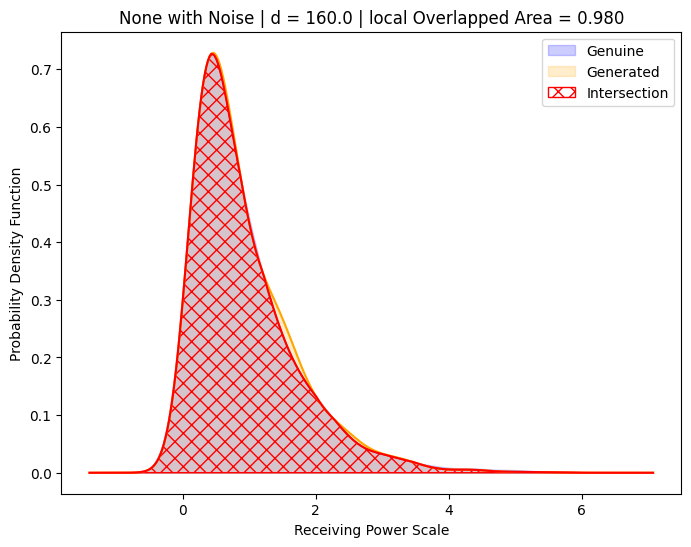

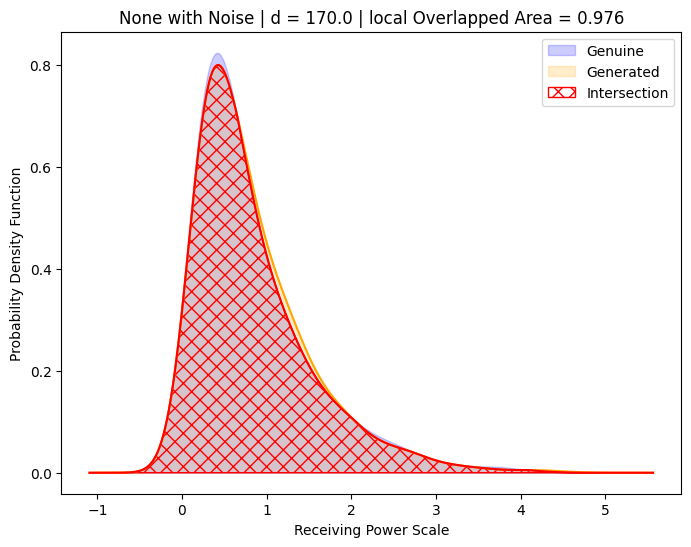

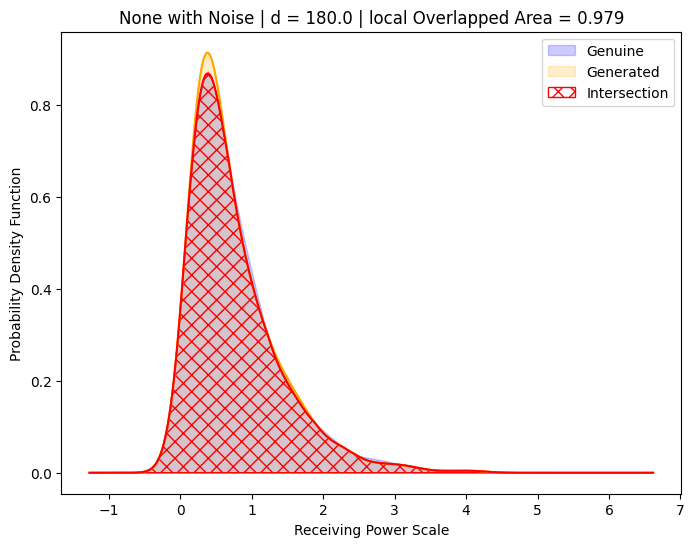

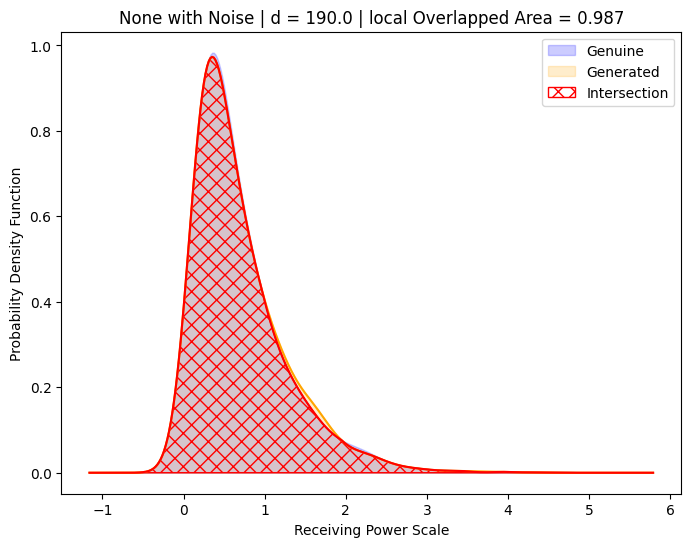

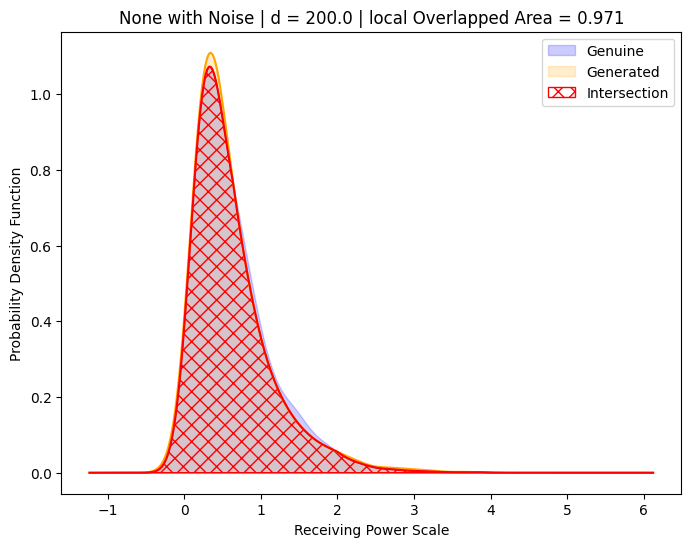

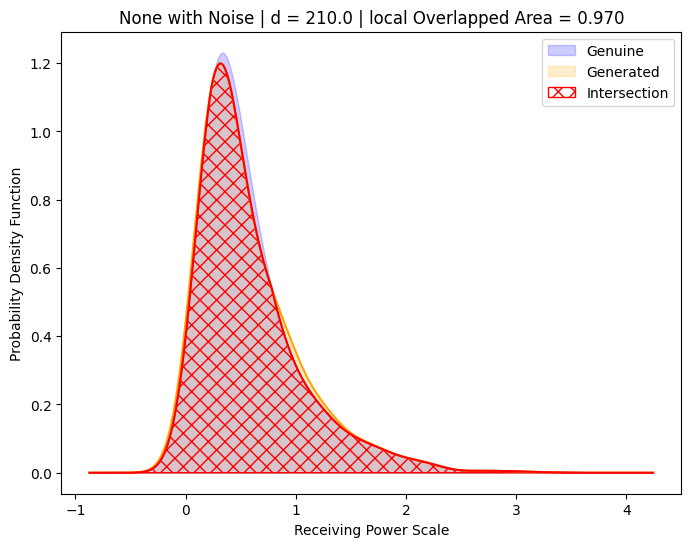

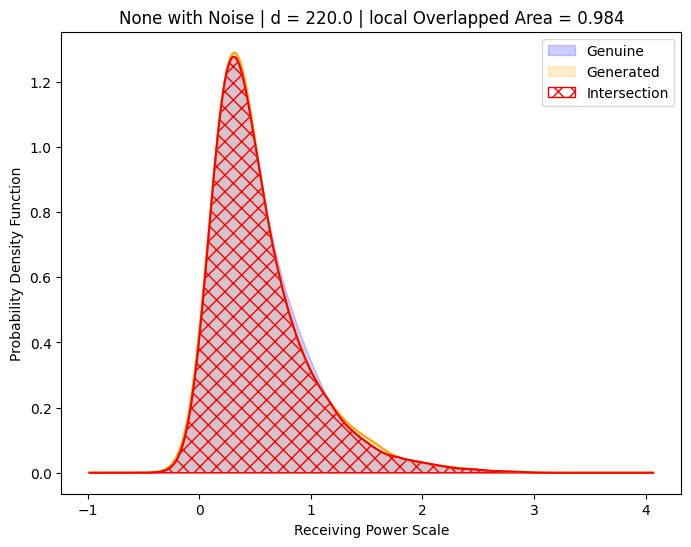

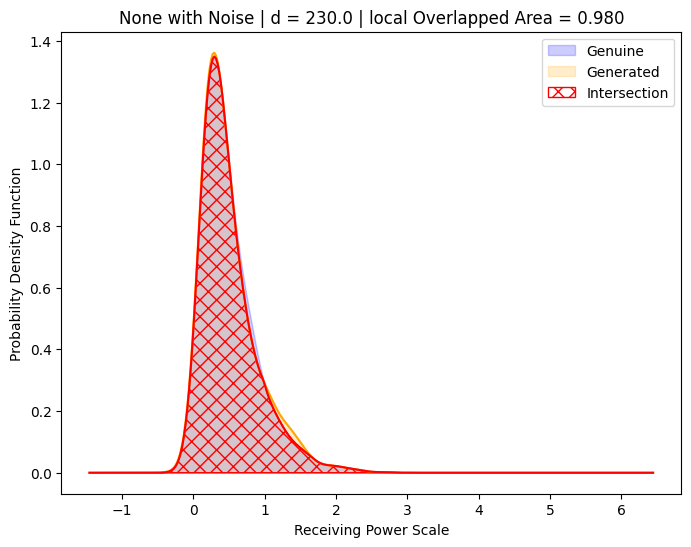

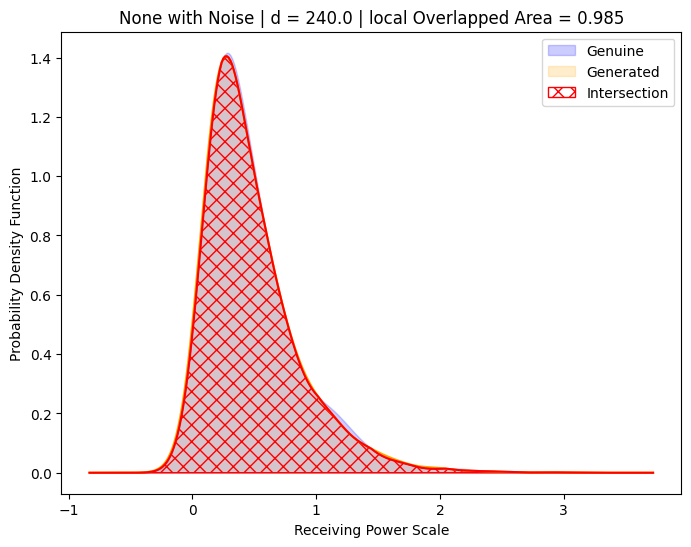

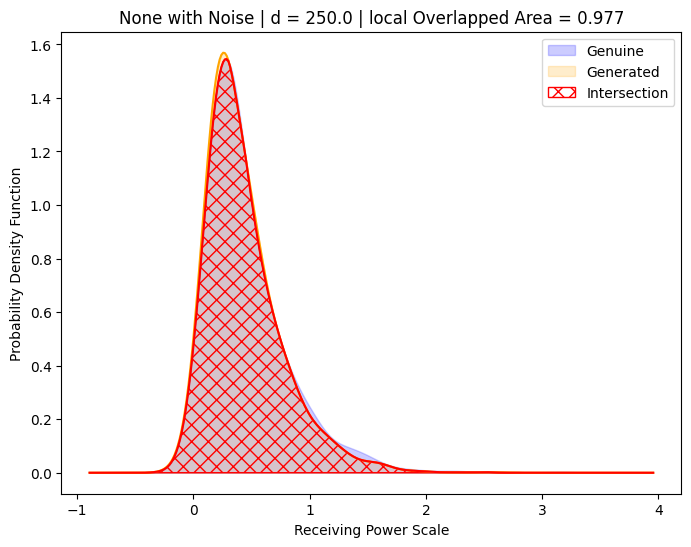

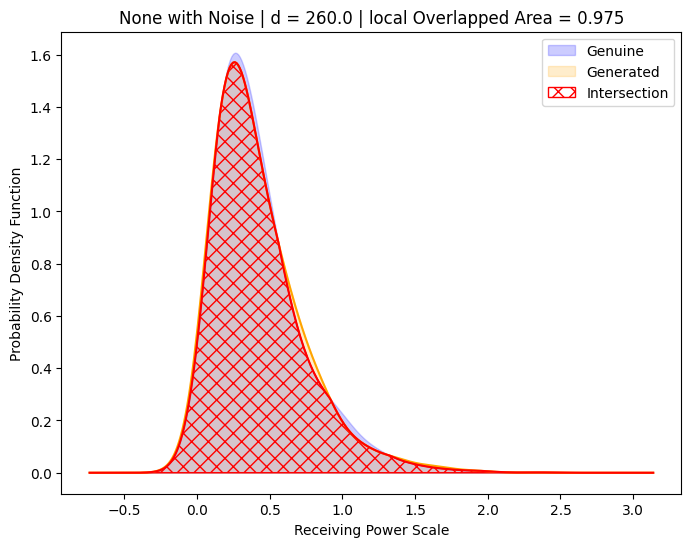

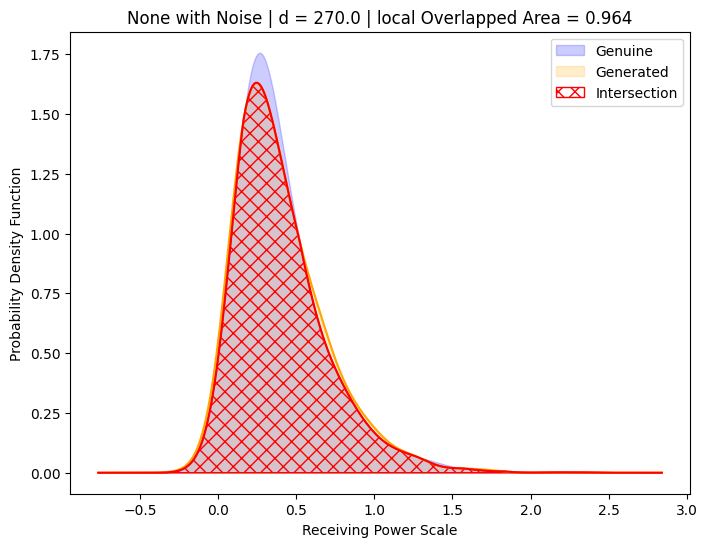

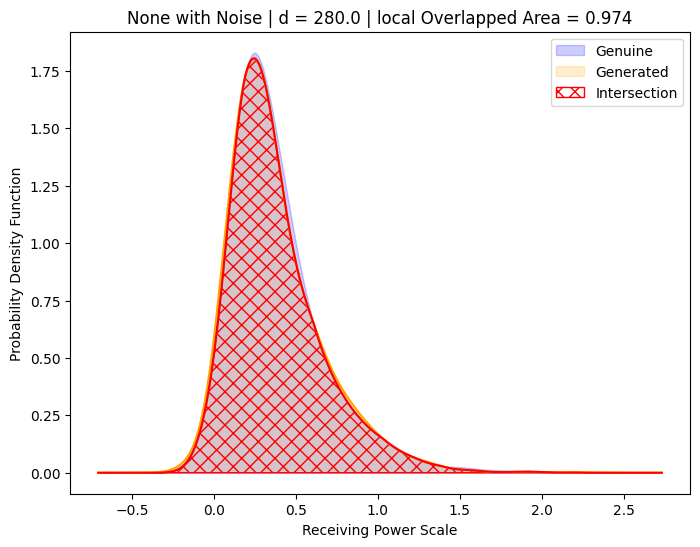

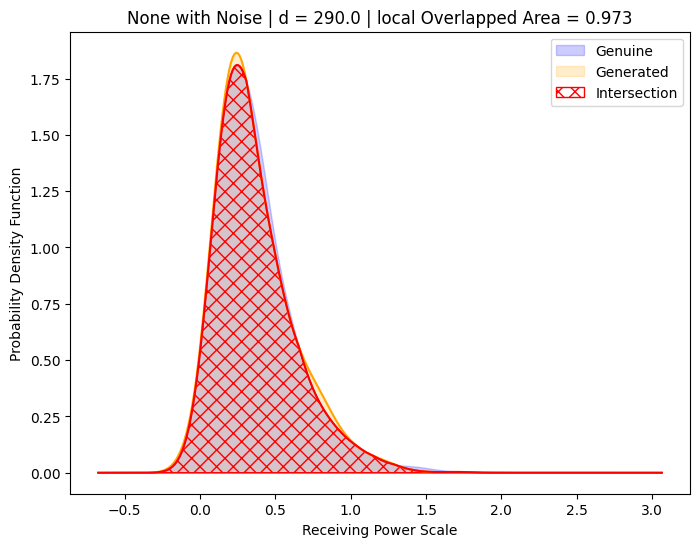

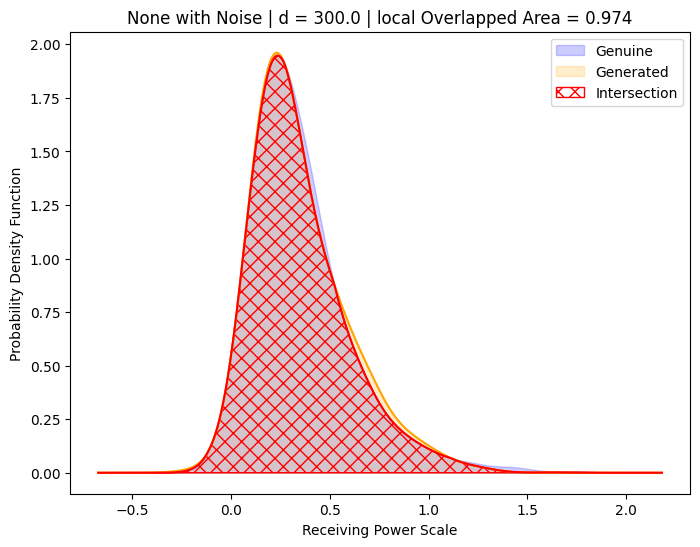

In [33]:
df_n_e2_oa = evaluations.evaluation_OA(
    df_to_evaluate=df_n_e2_test_back_scaled,
    name_model=None,
    dir_main_to_save=f"./evaluations",
    show_plot=True,
    to_save=False,
)

In [34]:
df_n_e2_oa['area_overlapped'].mean()

0.9693874951772453

In [35]:
df_n_e2_oa

d  area_overlapped
0    0.0         0.962043
1    1.0         0.957595
2    2.0         0.960977
3    3.0         0.957444
4    4.0         0.953139
5    5.0         0.952890
6    6.0         0.949742
7    7.0         0.966874
8    8.0         0.970683
9    9.0         0.963985
10  10.0         0.954201
11  11.0         0.971532
12  12.0         0.970977
13  13.0         0.966776
14  14.0         0.971786
15  15.0         0.980282
16  16.0         0.976328
17  17.0         0.978759
18  18.0         0.987424
19  19.0         0.971048
20  20.0         0.969923
21  21.0         0.983984
22  22.0         0.979581
23  23.0         0.984862
24  24.0         0.977175
25  25.0         0.975453
26  26.0         0.964123
27  27.0         0.974120
28  28.0         0.973480
29  29.0         0.974439

In [36]:
# Got this result and updated to OA_chart_MDN.csv

## Nakagami e1

In [37]:
df_whole_n_e1.groupby(by=['epoch']).mean()

loss  val_loss    avg_oa       std  version    metric
epoch                                                           
1      1.210835  0.492034  0.639342  0.156195      4.5  0.326953
2      0.178050  0.121056  0.944068  0.033237      4.5  0.877594
3      0.119215  0.119970  0.952280  0.016034      4.5  0.920212
4      0.119524  0.118895  0.955185  0.013745      4.5  0.927695
5      0.117227  0.117362  0.961409  0.013934      4.5  0.933541
6      0.117711  0.118458  0.953734  0.015415      4.5  0.922905
7      0.117030  0.116349  0.960982  0.013871      4.5  0.933240
8      0.116387  0.117074  0.954896  0.015972      4.5  0.922952
9      0.116698  0.116556  0.961747  0.014471      4.5  0.932806
10     0.116324  0.116344  0.963077  0.012959      4.5  0.937159
11     0.116167  0.116626  0.956052  0.014076      4.5  0.927900
12     0.118020  0.118145  0.954516  0.015401      4.5  0.923713
13     0.116164  0.115965  0.961733  0.016650      4.5  0.928434
14     0.116054  0.117067  0.962890  0.013003      4.5  0.936885
15     0.115895  0.116625  0.960340  0.015849      4.5  0.928642

In [38]:
df_whole_n_e1['val_loss'].corr(df_whole_n_e1['metric'])

-0.8393611955129866

## Nakagami e2

In [39]:
df_whole_n_e2.groupby(by=['epoch']).mean()

loss  val_loss    avg_oa       std  version    metric
epoch                                                           
1      1.396877  0.389063  0.601927  0.153954      4.5  0.294019
2      0.213617 -0.025023  0.884358  0.054375      4.5  0.775609
3     -0.089185 -0.108589  0.948302  0.016731      4.5  0.914840
4     -0.085777 -0.109993  0.945085  0.018629      4.5  0.907828
5     -0.113278 -0.116231  0.950972  0.013915      4.5  0.923141
6     -0.116271 -0.116744  0.954812  0.013796      4.5  0.927219
7     -0.116764 -0.116213  0.949527  0.014115      4.5  0.921296
8     -0.117351 -0.117668  0.951956  0.013635      4.5  0.924686
9     -0.117448 -0.117889  0.949306  0.013776      4.5  0.921754
10    -0.118531 -0.118904  0.952836  0.013965      4.5  0.924906
11    -0.118031 -0.118756  0.951787  0.014569      4.5  0.922648
12    -0.119486 -0.118995  0.959971  0.012361      4.5  0.935248
13    -0.118699 -0.116885  0.947956  0.015193      4.5  0.917569
14    -0.119534 -0.119219  0.950948  0.013427      4.5  0.924093
15    -0.119682 -0.117776  0.952343  0.014761      4.5  0.922821

In [40]:
df_whole_n_e2['val_loss'].corr(df_whole_n_e2['metric'])

-0.9289550899348975

In [41]:
df_whole_n_e1

epoch      loss  val_loss    avg_oa       std  version    metric
0        1  1.320570  1.370258  0.366375  0.263245        0 -0.160116
1        2  0.303417  0.124234  0.833811  0.197575        0  0.438662
2        3  0.120996  0.120384  0.934968  0.023459        0  0.888051
3        4  0.118348  0.117933  0.962231  0.017274        0  0.927684
4        5  0.116611  0.116618  0.962296  0.014546        0  0.933205
..     ...       ...       ...       ...       ...      ...       ...
145     11  0.117471  0.117392  0.964830  0.016607        9  0.931615
146     12  0.117163  0.117276  0.970621  0.009773        9  0.951075
147     13  0.117305  0.117385  0.958441  0.014924        9  0.928592
148     14  0.116814  0.118318  0.963668  0.013751        9  0.936165
149     15  0.117918  0.121006  0.966117  0.018069        9  0.929979

[150 rows x 7 columns]

# ScaledPE Trial

## ScaledPE for n1 e1 Global Best

In [42]:
evaluations.calculate_ScaledPE_Nakagami(df=df_n_e1_b_test_back_scaled, nakagami_con=con_n_test)

19.899683333333336

## ScaledPE for n1 e1 Global Median

In [43]:
evaluations.calculate_ScaledPE_Nakagami(df=df_n_e1_m_test_back_scaled, nakagami_con=con_n_test)

18.523466666666668

## ScaledPE for n1 e2

In [44]:
evaluations.calculate_ScaledPE_Nakagami(df=df_n_e2_test_back_scaled, nakagami_con=con_n_e2_test)

5.5815666666666655